## Dihedral Analysis + Classification

We want to address what structural motifs are present in the terphenyl oligamer as it is subjected to the temperature changes of REMD. We will rerun the torsion analysis we ran on the vanilla MD simulations to confirm that the distributions are similar (meaning that we effectively sampled these distributions on our first pass) and to classify monomer structures to see what are typical conformations.

The goal of this analysis is to be able to extract specific frames coresponding to specific "classified" structures.

We will attempt 3 types of clustering in this jupyter-notebook. First we will

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils
import os
import h_bonds
import mdtraj
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
torsion_ids = ["A", "B", "CC", "D", "E", "F", "G"]

torsion_annotations = [[torsion_id + str(i) for i in range(1, 5)] for torsion_id in torsion_ids]

Here we output the atoms making up the torsion we want to look at. These torsions are extracted from an annotated .itp file which has speicifc atoms manually selected. There are torsions A-G (with C being represented as CC to not be confused with carbon naming). Here we show that can extract torsions at all temperatures.

In [4]:
itp_reader = utils.ReadItpFile("../OCT_dihes.itp")
selector = itp_reader.construct_dihe_selection(torsion_annotations[1])

In [5]:
remd_trajs = h_bonds.REMD_trajectories("/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/200K_to_350K", "npt", "whole.xtc","sim", "/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/200K_to_350K/sim0/berendsen.gro", np = 4)

ReplicaReplicaReplicaReplica    3906



npt.whole.xtc
npt.part0002.whole.xtcnpt.whole.xtc

npt.part0003.whole.xtcnpt.part0002.whole.xtcnpt.whole.xtc


npt.part0004.whole.xtcnpt.part0002.whole.xtcnpt.part0003.whole.xtc


npt.part0004.whole.xtcnpt.part0003.whole.xtc

npt.part0004.whole.xtcnpt.whole.xtc

npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
Replica 1
Replica 7
ReplicaReplica  410

npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
Replica 8
Replica 2
Replica 11
Replica 5
npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
npt.whole.xtc
npt.part0002.whole.xtc
npt.part0003.whole.xtc
npt.part0004.whole.xtc
npt.whole.xtc
npt.part0002.whole.xtc
npt.part000

In [6]:
dihes = utils.get_dihedrals(selector, remd_trajs.trajs[0])

In [7]:
torsions_temps = []
for i_rep in range(remd_trajs.n_replicas):
    dihes_t = utils.get_dihedrals(selector, remd_trajs.trajs[i_rep])
    torsions_temps.append(dihes_t)

## All 1D Torsion Distributions

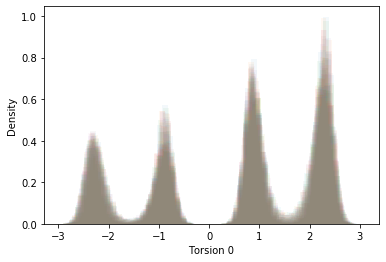

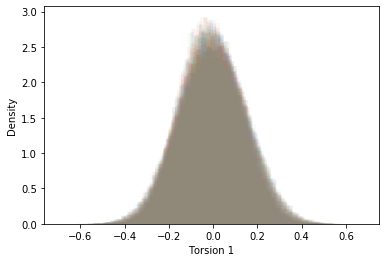

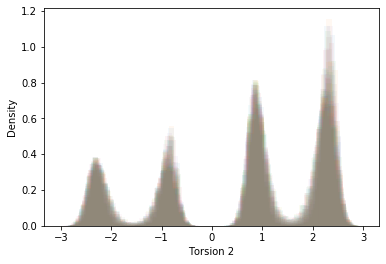

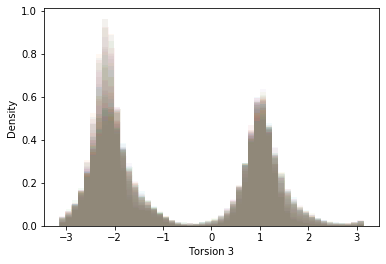

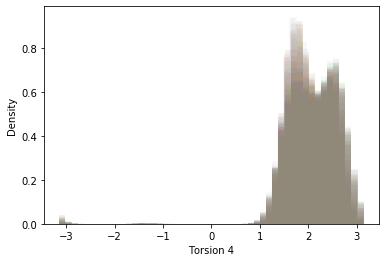

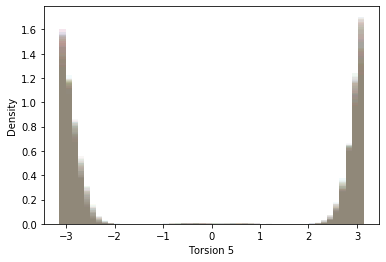

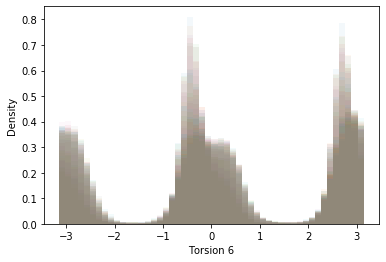

In [14]:
torsion_matrix = []
for i_torsions in range(len(torsion_annotations)):
    itp_reader = utils.ReadItpFile("../OCT_dihes.itp")
    selector = itp_reader.construct_dihe_selection(torsion_annotations[i_torsions])
    dihes = utils.get_dihedrals(selector, remd_trajs.trajs[0])
    torsions_temps = []
    for i_rep in range(remd_trajs.n_replicas):
        dihes_t = utils.get_dihedrals(selector, remd_trajs.trajs[i_rep])
        torsions_temps.append(dihes_t)
    plt.figure()
    for torsions in torsions_temps:
        hist = plt.hist(torsions, alpha = 0.05, bins=50, density=True)
    plt.xlabel("Torsion " + str(i_torsions))
    plt.ylabel("Density") 

## Monomer Classification

We can now extract the torsions for each temperature

In [ ]:
classification_matrix = []
for i_torsions in range(len(torsion_annotations)):
    itp_reader = utils.ReadItpFile("../OCT_dihes.itp")
    selector = itp_reader.construct_dihe_selection(torsion_annotations[i_torsions])
    dihes = utils.get_dihedrals(selector, remd_trajs.trajs[0])
    torsions_temps = []
    for i_rep in range(remd_trajs.n_replicas):
        dihes_t = utils.get_dihedrals(selector, remd_trajs.trajs[i_rep])
        torsions_temps.append(dihes_t)
    all_torsions = np.array(torsions_temps)
    print(all_torsions.shape)
    total_torsions = all_torsions.shape[1]
    classification_matrix.append(all_torsions)

In [ ]:
classification_matrix = np.array(classification_matrix)
print(classification_matrix.shape)
classification_matrix = classification_matrix.reshape(40, 7 * 6, int(classification_matrix.shape[2] / 6 ) )

In [ ]:
# Indicies represent:
# 1. Torsions
# 2. Residues
# 3. Temperature
# 4. frames
print(classification_matrix.shape)

In [ ]:
per_monomer_torsions = classification_matrix.reshape(classification_matrix.shape[0], -1)
print(per_monomer_torsions.shape)

# Convert to x and y components of torsions to remove periodic variables
per_monomer_torsions_comp = []
for i in range(per_monomer_torsions.shape[0]):
    per_monomer_torsions_comp.append(np.cos(per_monomer_torsions[i, :]))
    per_monomer_torsions_comp.append(np.sin(per_monomer_torsions[i, :]))
torsion_comps = np.array(per_monomer_torsions_comp).reshape(40, 84, 3608)
print(torsion_comps.shape)

In [ ]:
per_monomer_torsions = per_monomer_torsions.reshape(40, 42, 3608)
per_monomer_torsions.shape

In [ ]:
structure_class = []
n_residues = 6
n_torsions = 7
for j in range(per_monomer_torsions.shape[0]):
    per_temp_classes = []
    for i in range(per_monomer_torsions.shape[2]):
        id_str = ""
        torsions =  per_monomer_torsions[j, :, i]
        for k in range(n_residues):
            # Torsion 1
            # print("Index:", 0 + k*n_torsions)
            if  torsions[0 + k*n_torsions] >= -np.pi and torsions[0 + k*n_torsions] <= -np.pi/2:
                id_str += "0"
            elif torsions[0 + k*n_torsions] >= -np.pi/2 and torsions[0 + k*n_torsions] <= 0:
                id_str += "1"
            elif torsions[0 + k*n_torsions] >= 0 and torsions[0 + k*n_torsions] <= np.pi/2:
                id_str += "2"
            elif torsions[0 + k*n_torsions] >= np.pi/2 and torsions[0 + k*n_torsions] <= np.pi:
                id_str += "3"

            # Torsion 2
            # print("Index:", 2 + k*n_torsions)
            if  torsions[2+ k*n_torsions] >= -np.pi and torsions[2+ k*n_torsions] <= -np.pi/2:
                id_str += "0"
            elif torsions[2+ k*n_torsions] >= -np.pi/2 and torsions[2+ k*n_torsions] <= 0:
                id_str += "1"
            elif torsions[2+ k*n_torsions] >= 0 and torsions[2+ k*n_torsions] <= np.pi/2:
                id_str += "2"
            elif torsions[2+ k*n_torsions] >= np.pi/2 and torsions[2+ k*n_torsions] <= np.pi:
                id_str += "3"

            # Torsion 3
            # print("Index:", 3 + k*n_torsions)
            if  torsions[3+ k*n_torsions] >= - np.pi and torsions[3+ k*n_torsions] <= 0:
                id_str += "0"
            elif  torsions[3+ k*n_torsions] >= 0 and torsions[3+ k*n_torsions] <= np.pi:
                id_str += "1"

            # Torsion 4
            # print("Index:", 6 + k*n_torsions)
            if np.abs(torsions[6+ k*n_torsions]) <= np.pi/2:
                id_str += "0"
            elif np.abs(torsions[6+ k*n_torsions]) >= np.pi/2:
                id_str += "1"

        # Add to list
        per_temp_classes.append(id_str)
    structure_class.append(per_temp_classes)
structure_class = np.array(structure_class)

In [ ]:
structure_class.shape

In [ ]:
pandas.DataFrame(structure_class)

In [ ]:
test = structure_class[4, :]
test

In [ ]:
# Go from 3608 vector of configrations to a 3608x3608 matrix of distances
dist_matrix = np.zeros([test.shape[0],test.shape[0]])
for i in range(test.shape[0]):
    for j in range(test.shape[0]):
        dist_matrix[i, j] = sum([int(test[i][k] != test[j][k]) for k in range(len(test[0]))])
print(dist_matrix)

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(dist_matrix)

In [ ]:
k_means.labels_

NameError: name 'dist_matrix' is not defined

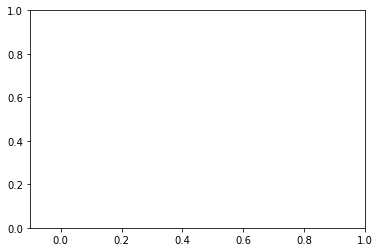

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = np.arange(2, 10, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1= plt.subplots(1, 1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dist_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dist_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dist_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dist_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_

plt.show()

In [ ]:
if not os.path.isdir("binary_classification"):
    os.mkdir("binary_classification")
for i_temp in range(structure_class.shape[0]):
    test = structure_class[i_temp, :]
    # Go from 3608 vector of configrations to a 3608x3608 matrix of distances
    dist_matrix = np.zeros([test.shape[0],test.shape[0]])
    for i in range(test.shape[0]):
        for j in range(test.shape[0]):
            dist_matrix[i, j] = sum([int(test[i][k] != test[j][k]) for k in range(len(test[0]))])
    print(dist_matrix)
    k_means = KMeans(n_clusters=3)
    k_means.fit(dist_matrix)
    
    if not os.path.isdir(os.path.join("binary_classification", str(i_temp))):
        os.mkdir(os.path.join("binary_classification", str(i_temp)))
    for i_cluster in np.unique(k_means.labels_):
        print("Cluster index", i_cluster)
        cluster_index = np.where(k_means.labels_ == i_cluster)
        print(test[cluster_index])
        cluster = remd_trajs.trajs[i_temp][cluster_index]
        print(os.path.join("binary_classification", str(i_temp), "test_" + str(i_cluster) + ".pdb"))
        cluster.save(os.path.join("binary_classification", str(i_temp), "test_" + str(i_cluster) + ".pdb"))

## Clustering based on angle components

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
classification_matrix.shape

In [ ]:
torsion_component_shape = list(classification_matrix.shape)
torsion_component_shape[1] = torsion_component_shape[1] * 2
classification_matrix_comps = np.zeros(torsion_component_shape)

In [ ]:
torsion_component_shape = list(classification_matrix.shape)
torsion_component_shape[1] = torsion_component_shape[1] * 2
classification_matrix_comps = np.zeros(torsion_component_shape)
for i in range(classification_matrix.shape[1]):
    torsions = classification_matrix[:, i, :]
    classification_matrix_comps[:, 2*i, :] = np.cos(torsions)
    classification_matrix_comps[:, 2*i + 1, :] = np.sin(torsions)
classification_matrix_comps.shape

In [ ]:
per_monomer_torsions_comp = np.array(per_monomer_torsions_comp)
per_monomer_torsions_comp.shape

In [ ]:
for i in range(classification_matrix_comps.shape[0]):
    temp_frames = classification_matrix_comps[i, :, :]
    bandwidth = 1.5
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs= -1)
    print(temp_frames.shape)
    ms.fit(temp_frames.T)
    labels = ms.labels_
    print(labels)
    unique, counts = np.unique(labels, return_counts = True)
    for a, b in zip(unique, counts):
        print("Label", a, ":", b)

In [ ]:
label_per_residue_temp_frame = labels.reshape(*classification_matrix.shape[1:])
label_per_residue_temp_frame.shape

In [ ]:
unique, counts = np.unique(labels,return_counts=True)

for u, c in zip(unique, counts):
    print("Cluster", u, ":", c)

In [ ]:
cluster_torsions = [np.arctan2(ms.cluster_centers_[:, 2*i + 1], ms.cluster_centers_[:, 2*i]) for i in range(7)]
cluster_torsions = np.array(cluster_torsions)
cluster_torsions.shape

In [ ]:
import matplotlib
cm = matplotlib.cm.cmap_d["Set1"]

cluster_id = 0
colors = cm(np.linspace(0,1,7))
for i in range(7):
    plt.figure(dpi=300)
    hist = plt.hist(np.arctan2(per_monomer_torsions_comp[2*i + 1,:], per_monomer_torsions_comp[2*i,:]), bins=80, density=True, color=colors[i])
    print(colors[i])
    plt.xlabel("Torsion " + str(i))
    plt.ylabel("Density")
    plt.savefig("terphenyl_remd_torsion_" + str(i) + ".png")
    colors = cm(np.linspace(0,1,cluster_torsions.shape[1]))
    for j in range(cluster_torsions.shape[1]):
        plt.vlines(cluster_torsions[i,j], ymin=0, ymax=np.max(hist[0]), color = colors[j], linestyles = "dotted", linewidths=2)

In [ ]:
# Extract structures of clusters

## RMSD Clustering



In [9]:
top = remd_trajs.trajs[0].topology
resname_selection = top.select("resname OCT")

octamer = remd_trajs.trajs[29].atom_slice(resname_selection)

In [10]:
octamer.superpose(octamer[0])

<mdtraj.Trajectory with 3608 frames, 373 atoms, 1 residues, and unitcells at 0x7f0a47436370>

In [11]:
rmsd_matrix = np.zeros([octamer.n_frames]*2)
for i in range(octamer.n_frames):
    rmsd_matrix[:, i] = mdtraj.rmsd(octamer, octamer[i])

In [24]:
temp_silhouette_scores = []
for i_temp in range(len(remd_trajs.trajs)):
    print("Temperature", i_temp)
    octamer = remd_trajs.trajs[i_temp].atom_slice(resname_selection)
    octamer.superpose(octamer[0])
    rmsd_matrix = np.zeros([octamer.n_frames]*2)
    for i in range(octamer.n_frames):
        rmsd_matrix[:, i] = mdtraj.rmsd(octamer, octamer[i])
    n_clusters = np.arange(2, 40, 2)
    silhouette_scores = []
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(rmsd_matrix)

        avg_silhouette = silhouette_score(rmsd_matrix, kmeans.fit_predict(rmsd_matrix))
        silhouette_scores.append(avg_silhouette)
        print(n, "clusters,", "silhouette score:", avg_silhouette)
    temp_silhouette_scores.append(silhouette_scores)

Temperature 0
2 clusters, silhouette score: 0.2574213800970541
4 clusters, silhouette score: 0.28775143870990577
6 clusters, silhouette score: 0.3001573599895302
8 clusters, silhouette score: 0.3354499124675876
10 clusters, silhouette score: 0.3645837123752954
12 clusters, silhouette score: 0.37556459717055807
14 clusters, silhouette score: 0.3887928576615987
16 clusters, silhouette score: 0.3964523107280065
18 clusters, silhouette score: 0.3990966214732435
20 clusters, silhouette score: 0.40514437333429765
22 clusters, silhouette score: 0.40011427397577615
24 clusters, silhouette score: 0.405226157237934
26 clusters, silhouette score: 0.4133968581770129
28 clusters, silhouette score: 0.4114169093892919
30 clusters, silhouette score: 0.38578196682565385
32 clusters, silhouette score: 0.3829929879366187
34 clusters, silhouette score: 0.38243696353566636
36 clusters, silhouette score: 0.3735829701748065
38 clusters, silhouette score: 0.38631701925202383
Temperature 1
2 clusters, silhouet

20 clusters, silhouette score: 0.2464785433340465
22 clusters, silhouette score: 0.2510041975646142
24 clusters, silhouette score: 0.2569112035098184
26 clusters, silhouette score: 0.25632090313484346
28 clusters, silhouette score: 0.26844095143770846
30 clusters, silhouette score: 0.2686720978668321
32 clusters, silhouette score: 0.26905470330039866
34 clusters, silhouette score: 0.2717615363538696
36 clusters, silhouette score: 0.2781335047907145
38 clusters, silhouette score: 0.27496555197453015
Temperature 9
2 clusters, silhouette score: 0.2461170520986071
4 clusters, silhouette score: 0.18940127857980552
6 clusters, silhouette score: 0.1757805961339505
8 clusters, silhouette score: 0.17762112343852013
10 clusters, silhouette score: 0.2006685005290243
12 clusters, silhouette score: 0.20909001297347754
14 clusters, silhouette score: 0.21530078843613343
16 clusters, silhouette score: 0.2195579899035654
18 clusters, silhouette score: 0.21845971723470795
20 clusters, silhouette score: 

36 clusters, silhouette score: 0.17508539125535055
38 clusters, silhouette score: 0.17399003147205308
Temperature 17
2 clusters, silhouette score: 0.21345056117044428
4 clusters, silhouette score: 0.17795778992044944
6 clusters, silhouette score: 0.14238903045983617
8 clusters, silhouette score: 0.13456584332800478
10 clusters, silhouette score: 0.1427527400969894
12 clusters, silhouette score: 0.1409484459626051
14 clusters, silhouette score: 0.14002876332740088
16 clusters, silhouette score: 0.14324406200215772
18 clusters, silhouette score: 0.14734828924277524
20 clusters, silhouette score: 0.1466018750308946
22 clusters, silhouette score: 0.14719740395454664
24 clusters, silhouette score: 0.1486815867896733
26 clusters, silhouette score: 0.15369068137300163
28 clusters, silhouette score: 0.15736165754983697
30 clusters, silhouette score: 0.16058019030651818
32 clusters, silhouette score: 0.16293663651512183
34 clusters, silhouette score: 0.16038272964782654
36 clusters, silhouette 

14 clusters, silhouette score: 0.1253912421588618
16 clusters, silhouette score: 0.13170297415261528
18 clusters, silhouette score: 0.1327494427045008
20 clusters, silhouette score: 0.13442408479794182
22 clusters, silhouette score: 0.13010269606399255
24 clusters, silhouette score: 0.13117057634848053
26 clusters, silhouette score: 0.13431326322535023
28 clusters, silhouette score: 0.13101283582449466
30 clusters, silhouette score: 0.13299722137302517
32 clusters, silhouette score: 0.1319829647681369
34 clusters, silhouette score: 0.1286104531082437
36 clusters, silhouette score: 0.13287804485184684
38 clusters, silhouette score: 0.13172740881944547
Temperature 26
2 clusters, silhouette score: 0.2052125409228128
4 clusters, silhouette score: 0.1824161782899584
6 clusters, silhouette score: 0.16518317295751328
8 clusters, silhouette score: 0.13030216850425252
10 clusters, silhouette score: 0.12698389299843515
12 clusters, silhouette score: 0.1232562792310277
14 clusters, silhouette sco

30 clusters, silhouette score: 0.10800152446650121
32 clusters, silhouette score: 0.11076130926476772
34 clusters, silhouette score: 0.11262222751012729
36 clusters, silhouette score: 0.11483213896057373
38 clusters, silhouette score: 0.11267270617264065
Temperature 34
2 clusters, silhouette score: 0.21168730718836692
4 clusters, silhouette score: 0.1812278309822787
6 clusters, silhouette score: 0.14664319528676176
8 clusters, silhouette score: 0.1389140426379517
10 clusters, silhouette score: 0.1191247619184628
12 clusters, silhouette score: 0.11140571645034052
14 clusters, silhouette score: 0.11506208033839072
16 clusters, silhouette score: 0.11431010674240932
18 clusters, silhouette score: 0.1138901485842379
20 clusters, silhouette score: 0.10924501532747402
22 clusters, silhouette score: 0.10487122583894874
24 clusters, silhouette score: 0.10316019773934935
26 clusters, silhouette score: 0.10415256709257989
28 clusters, silhouette score: 0.10575498967902092
30 clusters, silhouette 

/home/lenny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


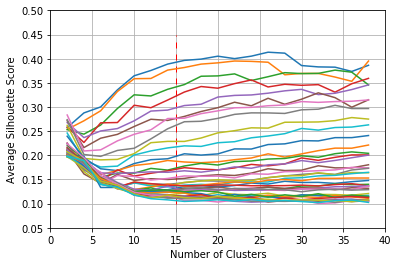

In [25]:
for i in range(len(temp_silhouette_scores)):
    plt.plot(n_clusters, temp_silhouette_scores[i])

plt.style.use('classic')
plt.ylabel("Average Silhouette Score")
plt.xlabel("Number of Clusters")
plt.vlines(15, ymin = 0.1, ymax=0.45, color="r", linestyles='dashed')
ax = plt.axes()
ax.grid()

In [12]:
# Fit with appropriate number of clusters
k_clusters = 15
kmeans = KMeans(n_clusters=k_clusters)
kmeans.fit(rmsd_matrix)



KMeans(n_clusters=15)

In [15]:
import h_bonds

h_bond_finder = h_bonds.HydrogenBondFinder(remd_trajs.trajs[0][0], remd_trajs.trajs[0][0].top)
h_bond_finder.get_donors()
h_bond_finder.get_acceptors()
n_h_bonds, h_bond_ids = h_bond_finder.get_hydrogen_bonds(remd_trajs.trajs[0])

100%|██████████| 3608/3608 [00:02<00:00, 1365.74it/s]


In [21]:
output = ""
for a, b in zip(*np.unique(kmeans.labels_, return_counts = True)):
    output += "Label: " +  str(a) + "Counts: " +  str(b) + "\n"
    indexes = np.where(kmeans.labels_ == a)
    n_h_bonds, h_bond_ids = h_bond_finder.get_hydrogen_bonds(remd_trajs.trajs[0][indexes])
    output += "# H-bonds " + str(np.average(n_h_bonds)) + "\n"
print(output)

100%|██████████| 370/370 [00:00<00:00, 1866.43it/s]

Label: 0Counts: 345
# H-bonds 3.4
Label: 1Counts: 309
# H-bonds 3.352750809061489
Label: 2Counts: 211
# H-bonds 3.4928909952606637
Label: 3Counts: 330
# H-bonds 3.3636363636363638
Label: 4Counts: 198
# H-bonds 3.3838383838383836
Label: 5Counts: 177
# H-bonds 3.5762711864406778
Label: 6Counts: 284
# H-bonds 3.3485915492957745
Label: 7Counts: 212
# H-bonds 3.30188679245283
Label: 8Counts: 152
# H-bonds 3.335526315789474
Label: 9Counts: 237
# H-bonds 3.3755274261603376
Label: 10Counts: 218
# H-bonds 3.3944954128440368
Label: 11Counts: 292
# H-bonds 3.3321917808219177
Label: 12Counts: 225
# H-bonds 3.52
Label: 13Counts: 48
# H-bonds 3.5833333333333335
Label: 14Counts: 370
# H-bonds 3.381081081081081



In [14]:
kmeans.cluster_centers_

array([[0.95069482, 0.86274409, 0.85549476, ..., 1.17449895, 1.18195946,
        1.16473859],
       [1.07797413, 1.21381833, 1.15974784, ..., 0.80912784, 0.79173171,
        0.79862084],
       [1.08932352, 1.07234937, 1.06097728, ..., 1.25293444, 1.26743818,
        1.28388157],
       ...,
       [1.14661038, 1.29555521, 1.26078104, ..., 1.00199975, 1.00972222,
        1.03132222],
       [1.37191974, 1.16429387, 1.18620616, ..., 1.54609717, 1.54844815,
        1.51819328],
       [0.86394732, 0.89755352, 0.85521232, ..., 1.02884398, 1.05271111,
        1.03669078]])

In [35]:
for i_temp in range(len(remd_trajs.trajs)):
    
    # Get trajectory from specific temperature
    octamer = remd_trajs.trajs[i_temp].atom_slice(resname_selection)
    
    # Create RMSD matrix for comparing configurations 
    rmsd_matrix = np.zeros([octamer.n_frames]*2)
    for i in range(octamer.n_frames):
        rmsd_matrix[:, i] = mdtraj.rmsd(octamer, octamer[i])
    
    # Fit with appropriate number of clusters
    k_clusters = 15
    kmeans = KMeans(n_clusters=k_clusters)
    kmeans.fit(rmsd_matrix)
    
    # Print silhouette score
    avg_silhouette = silhouette_score(rmsd_matrix, kmeans.fit_predict(rmsd_matrix))
    print("Temperature:", i_temp, "Silhouette Score:", avg_silhouette)

    
    
    dist_to_centroids = kmeans.transform(rmsd_matrix)
    closest_indices = np.argmin(dist_to_centroids, axis=0)
    
    # Create directories as needed
    if not os.path.isdir("rmsd_clustering_centroids"):
        os.mkdir("rmsd_clustering_centroids")
    if not os.path.isdir(os.path.join("rmsd_clustering_centroids", "temp_" + str(i_temp))):
        os.mkdir(os.path.join("rmsd_clustering_centroids", "temp_" + str(i_temp)))
    
    # Output relevant data
    with open(os.path.join("rmsd_clustering_centroids", "temp_" + str(i_temp), "data.txt"), "w") as data:
        for a, b in zip(*np.unique(kmeans.labels_, return_counts = True)):
            indexes = np.where(kmeans.labels_ == a)
            n_h_bonds, h_bond_ids = h_bond_finder.get_hydrogen_bonds(remd_trajs.trajs[0][indexes])
            print("Label:", a,
                  "Counts:", b,
                  "Avg. H-bonds:", np.average(n_h_bonds),
                  "Avg. RMSD:",  np.average(mdtraj.rmsd(octamer[indexes], octamer[closest_indices[a]])))
            data.write("Label: " +  str(a) + \
                      " Counts: " +  str(b) + \
                      " Avg. H-bonds: " +  str(np.average(n_h_bonds)) + \
                      " Avg. RMSD: " + str(np.average(mdtraj.rmsd(octamer[indexes], octamer[closest_indices[a]]))) + "\n")
            # Write centroids to file
            centroid = octamer[closest_indices[a]]
            centroid.save(os.path.join("rmsd_clustering_centroids", "temp_" + str(i_temp), "centroid_" + str(a) + ".pdb"))

 26%|██▌       | 124/480 [00:00<00:00, 1230.95it/s]

Temperature: 0 Silhouette Score: 0.39332037332154746


  0%|          | 0/211 [00:00<?, ?it/s]

Label: 0 Counts: 480 Avg. H-bonds: 4.583333333333333 Avg. RMSD: 0.19845542
Label: 1 Counts: 149 Avg. H-bonds: 2.959731543624161 Avg. RMSD: 0.396045


 36%|███▌      | 118/327 [00:00<00:00, 1172.03it/s]

Label: 2 Counts: 211 Avg. H-bonds: 3.5497630331753554 Avg. RMSD: 0.41546074


 37%|███▋      | 118/317 [00:00<00:00, 1179.00it/s]

Label: 3 Counts: 327 Avg. H-bonds: 2.397553516819572 Avg. RMSD: 0.9979804


 38%|███▊      | 117/310 [00:00<00:00, 1169.94it/s]

Label: 4 Counts: 317 Avg. H-bonds: 2.3438485804416405 Avg. RMSD: 0.8113308


100%|██████████| 187/187 [00:00<00:00, 1200.73it/s]


Label: 5 Counts: 310 Avg. H-bonds: 3.6580645161290324 Avg. RMSD: 0.3635322
Label: 6 Counts: 187 Avg. H-bonds: 3.893048128342246 Avg. RMSD: 0.16680588


  0%|          | 0/103 [00:00<?, ?it/s]

Label: 7 Counts: 241 Avg. H-bonds: 3.7012448132780085 Avg. RMSD: 0.24776906
Label: 8 Counts: 81 Avg. H-bonds: 3.4444444444444446 Avg. RMSD: 0.9387773


100%|██████████| 222/222 [00:00<00:00, 1270.41it/s]

Label: 9 Counts: 103 Avg. H-bonds: 2.9902912621359223 Avg. RMSD: 0.2543653
Label: 10 Counts: 222 Avg. H-bonds: 3.0675675675675675 Avg. RMSD: 0.5101752



100%|██████████| 275/275 [00:00<00:00, 1242.60it/s]


Label: 11 Counts: 275 Avg. H-bonds: 3.5272727272727273 Avg. RMSD: 0.57216954


 43%|████▎     | 112/261 [00:00<00:00, 1111.40it/s]

Label: 12 Counts: 138 Avg. H-bonds: 2.9782608695652173 Avg. RMSD: 0.34241408


 40%|████      | 123/306 [00:00<00:00, 1223.98it/s]

Label: 13 Counts: 261 Avg. H-bonds: 3.6475095785440614 Avg. RMSD: 0.5548477


100%|██████████| 306/306 [00:00<00:00, 1327.55it/s]


Label: 14 Counts: 306 Avg. H-bonds: 3.179738562091503 Avg. RMSD: 0.5385109


  0%|          | 0/293 [00:00<?, ?it/s]

Temperature: 1 Silhouette Score: 0.38160535456161343
Label: 0 Counts: 101 Avg. H-bonds: 3.1683168316831685 Avg. RMSD: 0.28742287


 44%|████▍     | 120/271 [00:00<00:00, 1194.17it/s]

Label: 1 Counts: 293 Avg. H-bonds: 3.348122866894198 Avg. RMSD: 0.5629006


  0%|          | 0/266 [00:00<?, ?it/s]

Label: 2 Counts: 271 Avg. H-bonds: 3.5682656826568264 Avg. RMSD: 0.35393995
Label: 3 Counts: 169 Avg. H-bonds: 3.4142011834319526 Avg. RMSD: 0.36670932


 26%|██▌       | 115/439 [00:00<00:00, 1149.22it/s]

Label: 4 Counts: 266 Avg. H-bonds: 3.4774436090225564 Avg. RMSD: 0.2581486


  0%|          | 0/359 [00:00<?, ?it/s]

Label: 5 Counts: 439 Avg. H-bonds: 3.30751708428246 Avg. RMSD: 0.20404986
Label: 6 Counts: 101 Avg. H-bonds: 3.3168316831683167 Avg. RMSD: 0.9062715


100%|██████████| 214/214 [00:00<00:00, 1265.28it/s]


Label: 7 Counts: 359 Avg. H-bonds: 3.4540389972144845 Avg. RMSD: 1.0159712
Label: 8 Counts: 214 Avg. H-bonds: 3.3411214953271027 Avg. RMSD: 0.5155194


 50%|█████     | 119/238 [00:00<00:00, 1182.49it/s]

Label: 9 Counts: 178 Avg. H-bonds: 3.1123595505617976 Avg. RMSD: 0.17919223


 56%|█████▌    | 119/214 [00:00<00:00, 1186.87it/s]

Label: 10 Counts: 238 Avg. H-bonds: 3.331932773109244 Avg. RMSD: 0.43594745


100%|██████████| 180/180 [00:00<00:00, 1166.23it/s]


Label: 11 Counts: 214 Avg. H-bonds: 3.4065420560747666 Avg. RMSD: 0.38672185
Label:

 32%|███▏      | 90/278 [00:00<00:00, 898.63it/s]

 12 Counts: 180 Avg. H-bonds: 3.6055555555555556 Avg. RMSD: 0.5481702


100%|██████████| 278/278 [00:00<00:00, 1194.25it/s]


Label: 13 Counts: 278 Avg. H-bonds: 3.402877697841727 Avg. RMSD: 0.5108777


100%|██████████| 307/307 [00:00<00:00, 1804.75it/s]


Label: 14 Counts: 307 Avg. H-bonds: 3.45928338762215 Avg. RMSD: 0.81479025


  0%|          | 0/359 [00:00<?, ?it/s]

Temperature: 2 Silhouette Score: 0.34692989888639547
Label: 0 Counts: 185 Avg. H-bonds: 3.4216216216216218 Avg. RMSD: 0.38670287


100%|██████████| 359/359 [00:00<00:00, 1396.84it/s]


Label: 1 Counts: 359 Avg. H-bonds: 3.2701949860724233 Avg. RMSD: 0.19797544


 50%|█████     | 126/251 [00:00<00:00, 1255.14it/s]

Label: 2 Counts: 445 Avg. H-bonds: 3.397752808988764 Avg. RMSD: 1.0204648


 48%|████▊     | 125/260 [00:00<00:00, 1246.94it/s]

Label: 3 Counts: 251 Avg. H-bonds: 3.366533864541833 Avg. RMSD: 0.48146427


 38%|███▊      | 124/326 [00:00<00:00, 1238.42it/s]

Label: 4 Counts: 260 Avg. H-bonds: 3.4461538461538463 Avg. RMSD: 0.42532995


 45%|████▍     | 128/286 [00:00<00:00, 1270.29it/s]

Label: 5 Counts: 326 Avg. H-bonds: 3.3588957055214723 Avg. RMSD: 0.8175925


 45%|████▌     | 128/282 [00:00<00:00, 1279.24it/s]

Label: 6 Counts: 286 Avg. H-bonds: 3.3286713286713288 Avg. RMSD: 0.3062354


100%|██████████| 186/186 [00:00<00:00, 1218.33it/s]


Label: 7 Counts: 282 Avg. H-bonds: 3.297872340425532 Avg. RMSD: 0.55501175
Label: 8 Counts: 186 Avg. H-bonds: 3.5053763440860215 Avg. RMSD: 0.39985058


 55%|█████▍    | 117/214 [00:00<00:00, 1166.65it/s]

Label: 9 Counts: 262 Avg. H-bonds: 3.568702290076336 Avg. RMSD: 0.38037214


 40%|████      | 81/201 [00:00<00:00, 808.39it/s]

Label: 10 Counts: 214 Avg. H-bonds: 3.7149532710280373 Avg. RMSD: 0.53247726


  0%|          | 0/107 [00:00<?, ?it/s]

Label: 11 Counts: 201 Avg. H-bonds: 3.5024875621890548 Avg. RMSD: 0.5518026
Label: 12 Counts: 144 Avg. H-bonds: 3.013888888888889 Avg. RMSD: 0.19464293


100%|██████████| 100/100 [00:00<00:00, 1120.49it/s]


Label: 13 Counts: 107 Avg. H-bonds: 3.4018691588785046 Avg. RMSD: 0.9826959
Label: 14 Counts: 100 Avg. H-bonds: 3.24 Avg. RMSD: 0.30338964


  0%|          | 0/384 [00:00<?, ?it/s]

Temperature: 3 Silhouette Score: 0.32151792409271446
Label: 0 Counts: 150 Avg. H-bonds: 3.6866666666666665 Avg. RMSD: 0.43520325


  0%|          | 0/261 [00:00<?, ?it/s]

Label: 1 Counts: 384 Avg. H-bonds: 3.4244791666666665 Avg. RMSD: 0.9934395
Label: 2 Counts: 169 Avg. H-bonds: 3.514792899408284 Avg. RMSD: 0.36787152


100%|██████████| 261/261 [00:00<00:00, 1265.63it/s]


Label: 3 Counts: 261 Avg. H-bonds: 3.471264367816092 Avg. RMSD: 0.50264955


 50%|████▉     | 129/260 [00:00<00:00, 1281.72it/s]

Label: 4 Counts: 381 Avg. H-bonds: 3.4881889763779528 Avg. RMSD: 0.5671017


 34%|███▍      | 120/350 [00:00<00:00, 1198.46it/s]

Label: 5 Counts: 260 Avg. H-bonds: 3.4923076923076923 Avg. RMSD: 0.32007357


 34%|███▍      | 128/375 [00:00<00:00, 1275.62it/s]

Label: 6 Counts: 350 Avg. H-bonds: 3.1685714285714286 Avg. RMSD: 0.19782211


  0%|          | 0/181 [00:00<?, ?it/s]

Label: 7 Counts: 375 Avg. H-bonds: 3.3706666666666667 Avg. RMSD: 0.92183644
Label: 8 Counts: 118 Avg. H-bonds: 3.211864406779661 Avg. RMSD: 0.8844487


  0%|          | 0/252 [00:00<?, ?it/s]

Label: 9 Counts: 181 Avg. H-bonds: 3.541436464088398 Avg. RMSD: 0.37697634
Label: 10 Counts: 103 Avg. H-bonds: 3.621359223300971 Avg. RMSD: 0.9537626


  0%|          | 0/246 [00:00<?, ?it/s]

Label: 11 Counts: 252 Avg. H-bonds: 3.392857142857143 Avg. RMSD: 0.39875436
Label: 12 Counts: 133 Avg. H-bonds: 2.857142857142857 Avg. RMSD: 0.20505635


 51%|█████     | 124/245 [00:00<00:00, 1235.35it/s]

Label: 13 Counts: 246 Avg. H-bonds: 3.386178861788618 Avg. RMSD: 0.5280311


100%|██████████| 245/245 [00:00<00:00, 1290.58it/s]


Label: 14 Counts: 245 Avg. H-bonds: 3.289795918367347 Avg. RMSD: 0.62919515


100%|██████████| 262/262 [00:00<00:00, 1887.76it/s]

Temperature: 4 Silhouette Score: 0.30035741476582567
Label: 0 Counts: 262 Avg. H-bonds: 3.2900763358778624 Avg. RMSD: 0.65035105



 27%|██▋       | 126/470 [00:00<00:00, 1255.94it/s]

Label: 1 Counts: 264 Avg. H-bonds: 3.5757575757575757 Avg. RMSD: 0.3160607


 48%|████▊     | 117/243 [00:00<00:00, 1164.48it/s]

Label: 2 Counts: 470 Avg. H-bonds: 3.4574468085106385 Avg. RMSD: 0.99959236


 26%|██▌       | 114/442 [00:00<00:00, 1131.77it/s]

Label: 3 Counts: 243 Avg. H-bonds: 3.4979423868312756 Avg. RMSD: 0.5199744


  0%|          | 0/281 [00:00<?, ?it/s]

Label: 4 Counts: 442 Avg. H-bonds: 3.32579185520362 Avg. RMSD: 0.5541828
Label: 5 Counts: 95 Avg. H-bonds: 3.0105263157894737 Avg. RMSD: 0.28438035


100%|██████████| 281/281 [00:00<00:00, 1314.64it/s]


Label: 6 Counts: 281 Avg. H-bonds: 3.1423487544483986 Avg. RMSD: 0.17895234


 37%|███▋      | 125/341 [00:00<00:00, 1244.47it/s]

Label: 7 Counts: 278 Avg. H-bonds: 3.323741007194245 Avg. RMSD: 0.42042038


  0%|          | 0/211 [00:00<?, ?it/s]

Label: 8 Counts: 341 Avg. H-bonds: 3.5219941348973607 Avg. RMSD: 0.9050193
Label: 9 Counts: 173 Avg. H-bonds: 3.3294797687861273 Avg. RMSD: 0.43591225


  0%|          | 0/124 [00:00<?, ?it/s]

Label: 10 Counts: 211 Avg. H-bonds: 3.4265402843601898 Avg. RMSD: 0.38593763
Label: 11 Counts: 99 Avg. H-bonds: 3.4242424242424243 Avg. RMSD: 0.9434349


100%|██████████| 204/204 [00:00<00:00, 1245.56it/s]


Label: 12 Counts: 124 Avg. H-bonds: 3.306451612903226 Avg. RMSD: 0.87619656
Label: 13 Counts: 204 Avg. H-bonds: 3.5784313725490198 Avg. RMSD: 0.58055884


100%|██████████| 121/121 [00:00<00:00, 1250.26it/s]


Label: 14 Counts: 121 Avg. H-bonds: 3.487603305785124 Avg. RMSD: 0.3966768


100%|██████████| 249/249 [00:00<00:00, 1738.07it/s]

Temperature: 5 Silhouette Score: 0.27257816197724116
Label: 0 Counts: 249 Avg. H-bonds: 3.4377510040160644 Avg. RMSD: 0.34992307



 47%|████▋     | 121/255 [00:00<00:00, 1202.09it/s]

Label: 1 Counts: 342 Avg. H-bonds: 3.517543859649123 Avg. RMSD: 0.5908675


 32%|███▏      | 125/386 [00:00<00:00, 1241.53it/s]

Label: 2 Counts: 255 Avg. H-bonds: 3.4 Avg. RMSD: 0.9904018


  0%|          | 0/367 [00:00<?, ?it/s]

Label: 3 Counts: 386 Avg. H-bonds: 3.4533678756476682 Avg. RMSD: 0.931491
Label: 4 Counts: 140 Avg. H-bonds: 3.357142857142857 Avg. RMSD: 0.87659115


 54%|█████▎    | 125/233 [00:00<00:00, 1245.24it/s]

Label: 5 Counts: 367 Avg. H-bonds: 3.4359673024523163 Avg. RMSD: 0.49493533


 47%|████▋     | 123/262 [00:00<00:00, 1223.14it/s]

Label: 6 Counts: 233 Avg. H-bonds: 3.278969957081545 Avg. RMSD: 0.6611754


  0%|          | 0/277 [00:00<?, ?it/s]

Label: 7 Counts: 262 Avg. H-bonds: 3.1946564885496183 Avg. RMSD: 0.55715525
Label: 8 Counts: 62 Avg. H-bonds: 3.129032258064516 Avg. RMSD: 0.30688077


100%|██████████| 277/277 [00:00<00:00, 1322.94it/s]


Label: 9 Counts: 277 Avg. H-bonds: 3.2310469314079424 Avg. RMSD: 0.17210801


 62%|██████▏   | 128/208 [00:00<00:00, 1279.56it/s]

Label: 10 Counts: 206 Avg. H-bonds: 3.495145631067961 Avg. RMSD: 0.53776515


  0%|          | 0/350 [00:00<?, ?it/s]

Label: 11 Counts: 208 Avg. H-bonds: 3.5288461538461537 Avg. RMSD: 0.4170011
Label: 12 Counts: 87 Avg. H-bonds: 3.3908045977011496 Avg. RMSD: 0.9201133


100%|██████████| 184/184 [00:00<00:00, 1179.44it/s]


Label: 13 Counts: 350 Avg. H-bonds: 3.3914285714285715 Avg. RMSD: 0.95564115
Label: 14 Counts: 184 Avg. H-bonds: 3.4184782608695654 Avg. RMSD: 0.4484006


 56%|█████▌    | 169/304 [00:00<00:00, 1676.34it/s]

Temperature: 6 Silhouette Score: 0.2615349390986552


  0%|          | 0/267 [00:00<?, ?it/s]

Label: 0 Counts: 304 Avg. H-bonds: 3.5723684210526314 Avg. RMSD: 0.55361086
Label: 1 Counts: 89 Avg. H-bonds: 3.6292134831460676 Avg. RMSD: 0.8607104


 58%|█████▊    | 125/216 [00:00<00:00, 1243.27it/s]

Label: 2 Counts: 267 Avg. H-bonds: 3.4269662921348316 Avg. RMSD: 0.9057118


  0%|          | 0/216 [00:00<?, ?it/s]

Label: 3 Counts: 216 Avg. H-bonds: 3.25 Avg. RMSD: 0.53644764
Label: 4 Counts: 151 Avg. H-bonds: 3.4503311258278146 Avg. RMSD: 0.91991216


 28%|██▊       | 114/407 [00:00<00:00, 1135.22it/s]

Label: 5 Counts: 216 Avg. H-bonds: 3.1527777777777777 Avg. RMSD: 0.15798046


 45%|████▌     | 122/269 [00:00<00:00, 1217.55it/s]

Label: 6 Counts: 407 Avg. H-bonds: 3.371007371007371 Avg. RMSD: 1.0301079


 56%|█████▋    | 112/199 [00:00<00:00, 1114.46it/s]

Label: 7 Counts: 269 Avg. H-bonds: 3.4646840148698885 Avg. RMSD: 0.40595683


 31%|███▏      | 111/354 [00:00<00:00, 1108.54it/s]

Label: 8 Counts: 199 Avg. H-bonds: 3.391959798994975 Avg. RMSD: 0.43373868


  0%|          | 0/273 [00:00<?, ?it/s]

Label: 9 Counts: 354 Avg. H-bonds: 3.426553672316384 Avg. RMSD: 0.5624291
Label: 10 Counts: 152 Avg. H-bonds: 3.276315789473684 Avg. RMSD: 0.6593667


100%|██████████| 181/181 [00:00<00:00, 1235.66it/s]


Label: 11 Counts: 273 Avg. H-bonds: 3.457875457875458 Avg. RMSD: 0.855868
Label: 12 Counts: 181 Avg. H-bonds: 3.546961325966851 Avg. RMSD: 0.42063937


 44%|████▎     | 125/286 [00:00<00:00, 1246.87it/s]

Label: 13 Counts: 244 Avg. H-bonds: 3.30327868852459 Avg. RMSD: 0.3556983


100%|██████████| 286/286 [00:00<00:00, 1318.57it/s]


Label: 14 Counts: 286 Avg. H-bonds: 3.269230769230769 Avg. RMSD: 0.6469132


 43%|████▎     | 183/427 [00:00<00:00, 1827.67it/s]

Temperature: 7 Silhouette Score: 0.25695372376611014


100%|██████████| 427/427 [00:00<00:00, 1749.09it/s]


Label: 0 Counts: 427 Avg. H-bonds: 3.4028103044496487 Avg. RMSD: 0.96422434


100%|██████████| 206/206 [00:00<00:00, 1195.98it/s]


Label: 1 Counts: 173 Avg. H-bonds: 3.2890173410404624 Avg. RMSD: 0.4476569
Label: 2 Counts: 206 Avg. H-bonds: 3.4611650485436893 Avg. RMSD: 0.9377172


 42%|████▏     | 120/288 [00:00<00:00, 1195.08it/s]

Label: 3 Counts: 177 Avg. H-bonds: 3.367231638418079 Avg. RMSD: 0.7224419


  0%|          | 0/279 [00:00<?, ?it/s]

Label: 4 Counts: 288 Avg. H-bonds: 3.3402777777777777 Avg. RMSD: 0.543718
Label: 5 Counts: 88 Avg. H-bonds: 3.25 Avg. RMSD: 0.28480685


100%|██████████| 208/208 [00:00<00:00, 1250.83it/s]


Label: 6 Counts: 279 Avg. H-bonds: 3.3978494623655915 Avg. RMSD: 0.5713754
Label: 7 Counts: 208 Avg. H-bonds: 3.480769230769231 Avg. RMSD: 0.3624916


 29%|██▉       | 124/431 [00:00<00:00, 1234.81it/s]

Label: 8 Counts: 347 Avg. H-bonds: 3.2939481268011526 Avg. RMSD: 0.49367425


100%|██████████| 184/184 [00:00<00:00, 1203.98it/s]


Label: 9 Counts: 431 Avg. H-bonds: 3.4733178654292343 Avg. RMSD: 0.96658486
Label: 10 Counts: 184 Avg. H-bonds: 3.1739130434782608 Avg. RMSD: 0.16036218


 57%|█████▋    | 112/195 [00:00<00:00, 1119.00it/s]

Label: 11 Counts: 167 Avg. H-bonds: 3.2994011976047903 Avg. RMSD: 0.9446965


 51%|█████     | 113/222 [00:00<00:00, 1129.21it/s]

Label: 12 Counts: 195 Avg. H-bonds: 3.6564102564102563 Avg. RMSD: 0.45605808


 55%|█████▍    | 118/216 [00:00<00:00, 1174.30it/s]

Label: 13 Counts: 222 Avg. H-bonds: 3.7027027027027026 Avg. RMSD: 0.5070057


100%|██████████| 216/216 [00:00<00:00, 1204.92it/s]


Label: 14 Counts: 216 Avg. H-bonds: 3.1666666666666665 Avg. RMSD: 0.6119396


  0%|          | 0/296 [00:00<?, ?it/s]

Temperature: 8 Silhouette Score: 0.2292133452491593
Label: 0 Counts: 223 Avg. H-bonds: 3.381165919282511 Avg. RMSD: 0.37094116


  0%|          | 0/314 [00:00<?, ?it/s]

Label: 1 Counts: 296 Avg. H-bonds: 3.3378378378378377 Avg. RMSD: 0.6909127
Label: 2 Counts: 136 Avg. H-bonds: 3.375 Avg. RMSD: 0.8619849


  0%|          | 0/218 [00:00<?, ?it/s]

Label: 3 Counts: 314 Avg. H-bonds: 3.468152866242038 Avg. RMSD: 0.47228396
Label: 4 Counts: 85 Avg. H-bonds: 3.4 Avg. RMSD: 0.3419269


 49%|████▉     | 127/258 [00:00<00:00, 1263.19it/s]

Label: 5 Counts: 218 Avg. H-bonds: 3.4311926605504586 Avg. RMSD: 1.0158782


 51%|█████▏    | 126/245 [00:00<00:00, 1251.47it/s]

Label: 6 Counts: 258 Avg. H-bonds: 3.6705426356589146 Avg. RMSD: 0.5859737


 26%|██▌       | 116/454 [00:00<00:00, 1158.65it/s]

Label: 7 Counts: 245 Avg. H-bonds: 3.273469387755102 Avg. RMSD: 0.9551522


 30%|███       | 128/420 [00:00<00:00, 1279.42it/s]

Label: 8 Counts: 454 Avg. H-bonds: 3.356828193832599 Avg. RMSD: 0.50911576


 37%|███▋      | 127/346 [00:00<00:00, 1263.53it/s]

Label: 9 Counts: 420 Avg. H-bonds: 3.4 Avg. RMSD: 0.9391572


 39%|███▉      | 125/321 [00:00<00:00, 1202.31it/s]

Label: 10 Counts: 346 Avg. H-bonds: 3.2890173410404624 Avg. RMSD: 0.950996


  0%|          | 0/51 [00:00<?, ?it/s]

Label: 11 Counts: 321 Avg. H-bonds: 3.4143302180685358 Avg. RMSD: 0.5426289
Label: 12 Counts: 165 Avg. H-bonds: 3.3454545454545452 Avg. RMSD: 0.45413885


100%|██████████| 76/76 [00:00<00:00, 1190.74it/s]


Label: 13 Counts: 51 Avg. H-bonds: 3.3137254901960786 Avg. RMSD: 0.84171724
Label: 14 Counts: 76 Avg. H-bonds: 3.4473684210526314 Avg. RMSD: 0.27571368


  0%|          | 0/161 [00:00<?, ?it/s]

Temperature: 9 Silhouette Score: 0.22267311589855476
Label: 0 Counts: 92 Avg. H-bonds: 3.4239130434782608 Avg. RMSD: 0.27870217


 56%|█████▋    | 112/199 [00:00<00:00, 1118.58it/s]

Label: 1 Counts: 161 Avg. H-bonds: 3.2236024844720497 Avg. RMSD: 0.46593717


 23%|██▎       | 121/537 [00:00<00:00, 1207.74it/s]

Label: 2 Counts: 199 Avg. H-bonds: 3.407035175879397 Avg. RMSD: 0.3415594


  0%|          | 0/433 [00:00<?, ?it/s]

Label: 3 Counts: 537 Avg. H-bonds: 3.521415270018622 Avg. RMSD: 0.5812172
Label: 4 Counts: 89 Avg. H-bonds: 3.3146067415730336 Avg. RMSD: 0.3721616


100%|██████████| 433/433 [00:00<00:00, 1475.66it/s]


Label: 5 Counts: 433 Avg. H-bonds: 3.344110854503464 Avg. RMSD: 0.9571112


 31%|███▏      | 121/386 [00:00<00:00, 1208.32it/s]

Label: 6 Counts: 48 Avg. H-bonds: 3.4791666666666665 Avg. RMSD: 0.82819897


 33%|███▎      | 121/370 [00:00<00:00, 1202.24it/s]

Label: 7 Counts: 386 Avg. H-bonds: 3.3678756476683938 Avg. RMSD: 0.5700421


100%|██████████| 199/199 [00:00<00:00, 1255.47it/s]


Label: 8 Counts: 370 Avg. H-bonds: 3.272972972972973 Avg. RMSD: 0.93330896
Label: 9 Counts: 199 Avg. H-bonds: 3.336683417085427 Avg. RMSD: 0.873027


100%|██████████| 213/213 [00:00<00:00, 1223.59it/s]

Label: 10 Counts: 295 Avg. H-bonds: 3.440677966101695 Avg. RMSD: 0.58343637



 47%|████▋     | 129/274 [00:00<00:00, 1289.95it/s]

Label: 11 Counts: 213 Avg. H-bonds: 3.4788732394366195 Avg. RMSD: 1.0146049


  0%|          | 0/221 [00:00<?, ?it/s]

Label: 12 Counts: 274 Avg. H-bonds: 3.343065693430657 Avg. RMSD: 0.6875584
Label: 13 Counts: 91 Avg. H-bonds: 3.4945054945054945 Avg. RMSD: 0.27742


100%|██████████| 221/221 [00:00<00:00, 1276.33it/s]


Label: 14 Counts: 221 Avg. H-bonds: 3.4705882352941178 Avg. RMSD: 0.94006


  0%|          | 0/272 [00:00<?, ?it/s]

Temperature: 10 Silhouette Score: 0.1982151035938367
Label: 0 Counts: 90 Avg. H-bonds: 3.2 Avg. RMSD: 0.33038047


 21%|██        | 113/534 [00:00<00:00, 1128.78it/s]

Label: 1 Counts: 272 Avg. H-bonds: 3.6213235294117645 Avg. RMSD: 0.60008097


  0%|          | 0/158 [00:00<?, ?it/s]

Label: 2 Counts: 534 Avg. H-bonds: 3.398876404494382 Avg. RMSD: 0.95010585
Label: 3 Counts: 174 Avg. H-bonds: 3.442528735632184 Avg. RMSD: 0.8619639


100%|██████████| 181/181 [00:00<00:00, 1125.55it/s]


Label: 4 Counts: 158 Avg. H-bonds: 3.537974683544304 Avg. RMSD: 0.82632184
Label: 5 

  0%|          | 0/163 [00:00<?, ?it/s]

Counts: 181 Avg. H-bonds: 3.3701657458563536 Avg. RMSD: 0.9765423
Label: 6 Counts: 87 Avg. H-bonds: 3.413793103448276 Avg. RMSD: 0.26062614


 39%|███▉      | 117/299 [00:00<00:00, 1169.69it/s]

Label: 7 Counts: 163 Avg. H-bonds: 3.233128834355828 Avg. RMSD: 0.494371


100%|██████████| 299/299 [00:00<00:00, 1275.13it/s]


Label: 8 Counts: 299 Avg. H-bonds: 3.4849498327759196 Avg. RMSD: 0.51873106


100%|██████████| 171/171 [00:00<00:00, 1096.90it/s]


Label: 9 Counts: 215 Avg. H-bonds: 3.3813953488372093 Avg. RMSD: 0.5789855
Label: 10 Counts: 171 Avg. H-bonds: 3.4502923976608186 Avg. RMSD: 0.34412456


 53%|█████▎    | 127/238 [00:00<00:00, 1260.45it/s]

Label: 11 Counts: 364 Avg. H-bonds: 3.3736263736263736 Avg. RMSD: 0.9209642


 39%|███▉      | 123/317 [00:00<00:00, 1227.62it/s]

Label: 12 Counts: 238 Avg. H-bonds: 3.4159663865546217 Avg. RMSD: 0.8156987


 35%|███▌      | 122/345 [00:00<00:00, 1217.49it/s]

Label: 13 Counts: 317 Avg. H-bonds: 3.3438485804416405 Avg. RMSD: 0.74985814


100%|██████████| 345/345 [00:00<00:00, 1344.54it/s]


Label: 14 Counts: 345 Avg. H-bonds: 3.2028985507246377 Avg. RMSD: 0.46104136


 45%|████▌     | 181/401 [00:00<00:00, 1801.79it/s]

Temperature: 11 Silhouette Score: 0.190959500600246


 50%|█████     | 128/254 [00:00<00:00, 1279.91it/s]

Label: 0 Counts: 401 Avg. H-bonds: 3.3840399002493764 Avg. RMSD: 0.8905854


 45%|████▍     | 125/278 [00:00<00:00, 1241.69it/s]

Label: 1 Counts: 254 Avg. H-bonds: 3.3818897637795278 Avg. RMSD: 0.60650325


 49%|████▉     | 126/258 [00:00<00:00, 1257.41it/s]

Label: 2 Counts: 278 Avg. H-bonds: 3.3309352517985613 Avg. RMSD: 0.7215756


  0%|          | 0/165 [00:00<?, ?it/s]

Label: 3 Counts: 258 Avg. H-bonds: 3.387596899224806 Avg. RMSD: 0.8929162
Label: 4 Counts: 141 Avg. H-bonds: 3.3333333333333335 Avg. RMSD: 0.94839543


 44%|████▍     | 120/272 [00:00<00:00, 1196.21it/s]

Label: 5 Counts: 165 Avg. H-bonds: 3.4060606060606062 Avg. RMSD: 0.42009535


  0%|          | 0/421 [00:00<?, ?it/s]

Label: 6 Counts: 272 Avg. H-bonds: 3.4080882352941178 Avg. RMSD: 0.5581642
Label: 7 Counts: 162 Avg. H-bonds: 3.4691358024691357 Avg. RMSD: 0.8841715


 26%|██▋       | 122/463 [00:00<00:00, 1215.18it/s]

Label: 8 Counts: 421 Avg. H-bonds: 3.401425178147268 Avg. RMSD: 0.9367437


  0%|          | 0/149 [00:00<?, ?it/s]

Label: 9 Counts: 463 Avg. H-bonds: 3.529157667386609 Avg. RMSD: 0.63009584
Label: 10 Counts: 132 Avg. H-bonds: 3.515151515151515 Avg. RMSD: 0.82424724


  0%|          | 0/99 [00:00<?, ?it/s]

Label: 11 Counts: 149 Avg. H-bonds: 3.174496644295302 Avg. RMSD: 0.4995662
Label: 12 Counts: 112 Avg. H-bonds: 3.2767857142857144 Avg. RMSD: 0.26254526


 38%|███▊      | 115/301 [00:00<00:00, 1142.32it/s]

Label: 13 Counts: 99 Avg. H-bonds: 3.4646464646464645 Avg. RMSD: 0.32118055


100%|██████████| 301/301 [00:00<00:00, 1356.19it/s]


Label: 14 Counts: 301 Avg. H-bonds: 3.3056478405315612 Avg. RMSD: 0.8817304


 54%|█████▍    | 176/327 [00:00<00:00, 1751.60it/s]

Temperature: 12 Silhouette Score: 0.17243587520539527


  0%|          | 0/386 [00:00<?, ?it/s]

Label: 0 Counts: 327 Avg. H-bonds: 3.458715596330275 Avg. RMSD: 0.7417209
Label: 1 Counts: 64 Avg. H-bonds: 3.34375 Avg. RMSD: 0.32667774


  0%|          | 0/237 [00:00<?, ?it/s]

Label: 2 Counts: 386 Avg. H-bonds: 3.326424870466321 Avg. RMSD: 0.90951216
Label: 3 Counts: 93 Avg. H-bonds: 3.2795698924731185 Avg. RMSD: 0.36746073


 24%|██▍       | 108/445 [00:00<00:00, 1077.78it/s]

Label: 4 Counts: 237 Avg. H-bonds: 3.308016877637131 Avg. RMSD: 0.9603818


 46%|████▌     | 126/276 [00:00<00:00, 1254.37it/s]

Label: 5 Counts: 445 Avg. H-bonds: 3.5258426966292133 Avg. RMSD: 0.6513526


  0%|          | 0/196 [00:00<?, ?it/s]

Label: 6 Counts: 276 Avg. H-bonds: 3.318840579710145 Avg. RMSD: 0.94766116
Label: 7 Counts: 111 Avg. H-bonds: 3.3333333333333335 Avg. RMSD: 0.26590732


 49%|████▉     | 121/247 [00:00<00:00, 1201.14it/s]

Label: 8 Counts: 196 Avg. H-bonds: 3.3520408163265305 Avg. RMSD: 0.6056201


 41%|████      | 111/273 [00:00<00:00, 1107.64it/s]

Label: 9 Counts: 247 Avg. H-bonds: 3.5182186234817814 Avg. RMSD: 0.8942987


  0%|          | 0/447 [00:00<?, ?it/s]

Label: 10 Counts: 273 Avg. H-bonds: 3.3736263736263736 Avg. RMSD: 0.6800433
Label: 11 Counts: 75 Avg. H-bonds: 3.3866666666666667 Avg. RMSD: 0.8760032


 47%|████▋     | 128/274 [00:00<00:00, 1275.46it/s]

Label: 12 Counts: 447 Avg. H-bonds: 3.373601789709172 Avg. RMSD: 0.95298874


100%|██████████| 157/157 [00:00<00:00, 1140.07it/s]


Label: 13 Counts: 274 Avg. H-bonds: 3.3686131386861313 Avg. RMSD: 0.5631764
Label: 14 Counts: 157 Avg. H-bonds: 3.4394904458598727 Avg. RMSD: 0.871691


  0%|          | 0/300 [00:00<?, ?it/s]

Temperature: 13 Silhouette Score: 0.16961661213125986
Label: 0 Counts: 240 Avg. H-bonds: 3.3208333333333333 Avg. RMSD: 0.67250866


100%|██████████| 300/300 [00:00<00:00, 1328.87it/s]


Label: 1 Counts: 300 Avg. H-bonds: 3.32 Avg. RMSD: 0.9923136


 42%|████▏     | 138/328 [00:00<00:00, 1367.45it/s]

Label: 2 Counts: 323 Avg. H-bonds: 3.588235294117647 Avg. RMSD: 0.5935404


  0%|          | 0/168 [00:00<?, ?it/s]

Label: 3 Counts: 328 Avg. H-bonds: 3.3384146341463414 Avg. RMSD: 0.96187943
Label: 4 Counts: 185 Avg. H-bonds: 3.4486486486486485 Avg. RMSD: 0.8596884


 22%|██▏       | 126/564 [00:00<00:00, 1253.60it/s]

Label: 5 Counts: 168 Avg. H-bonds: 3.517857142857143 Avg. RMSD: 0.8958517


  0%|          | 0/213 [00:00<?, ?it/s]

Label: 6 Counts: 564 Avg. H-bonds: 3.3439716312056738 Avg. RMSD: 0.9510469
Label: 7 Counts: 102 Avg. H-bonds: 3.303921568627451 Avg. RMSD: 0.23886788


  0%|          | 0/265 [00:00<?, ?it/s]

Label: 8 Counts: 213 Avg. H-bonds: 3.4507042253521125 Avg. RMSD: 0.5881873
Label: 9 Counts: 151 Avg. H-bonds: 3.2582781456953644 Avg. RMSD: 0.5387333


  0%|          | 0/326 [00:00<?, ?it/s]

Label: 10 Counts: 265 Avg. H-bonds: 3.3471698113207546 Avg. RMSD: 0.76422673
Label: 11 Counts: 120 Avg. H-bonds: 3.466666666666667 Avg. RMSD: 0.94354475


  0%|          | 0/228 [00:00<?, ?it/s]

Label: 12 Counts: 326 Avg. H-bonds: 3.441717791411043 Avg. RMSD: 0.89186215
Label: 13 Counts: 95 Avg. H-bonds: 3.357894736842105 Avg. RMSD: 0.3776384


100%|██████████| 228/228 [00:00<00:00, 1197.69it/s]


Label: 14 Counts: 228 Avg. H-bonds: 3.3991228070175437 Avg. RMSD: 0.55991423


  0%|          | 0/283 [00:00<?, ?it/s]

Temperature: 14 Silhouette Score: 0.16089351555264222
Label: 0 Counts: 146 Avg. H-bonds: 3.3904109589041096 Avg. RMSD: 0.83159816


 40%|████      | 111/276 [00:00<00:00, 1103.23it/s]

Label: 1 Counts: 283 Avg. H-bonds: 3.3180212014134276 Avg. RMSD: 0.7445242


 42%|████▏     | 122/288 [00:00<00:00, 1211.25it/s]

Label: 2 Counts: 276 Avg. H-bonds: 3.5072463768115942 Avg. RMSD: 0.94955623


100%|██████████| 100/100 [00:00<00:00, 1083.61it/s]


Label: 3 Counts: 288 Avg. H-bonds: 3.3090277777777777 Avg. RMSD: 0.9826464
Label: 4 Counts: 100 Avg. H-bonds: 3.5 Avg. RMSD: 0.90404165


 39%|███▉      | 114/289 [00:00<00:00, 1137.92it/s]

Label: 5 Counts: 217 Avg. H-bonds: 3.3824884792626726 Avg. RMSD: 0.8489893


 36%|███▌      | 110/307 [00:00<00:00, 1095.06it/s]

Label: 6 Counts: 289 Avg. H-bonds: 3.3356401384083045 Avg. RMSD: 0.7040663


  0%|          | 0/459 [00:00<?, ?it/s]

Label: 7 Counts: 307 Avg. H-bonds: 3.560260586319218 Avg. RMSD: 0.5989831
Label: 8 Counts: 89 Avg. H-bonds: 3.235955056179775 Avg. RMSD: 0.3366409


  0%|          | 0/252 [00:00<?, ?it/s]

Label: 9 Counts: 459 Avg. H-bonds: 3.3812636165577343 Avg. RMSD: 0.94974744
Label: 10 Counts: 132 Avg. H-bonds: 3.4015151515151514 Avg. RMSD: 0.27272016


 37%|███▋      | 126/338 [00:00<00:00, 1253.79it/s]

Label: 11 Counts: 252 Avg. H-bonds: 3.3492063492063493 Avg. RMSD: 0.8472289


 49%|████▉     | 109/222 [00:00<00:00, 1083.72it/s]

Label: 12 Counts: 338 Avg. H-bonds: 3.3402366863905324 Avg. RMSD: 0.6362599


 58%|█████▊    | 121/210 [00:00<00:00, 1209.88it/s]

Label: 13 Counts: 222 Avg. H-bonds: 3.4414414414414414 Avg. RMSD: 0.780598


100%|██████████| 210/210 [00:00<00:00, 1205.96it/s]


Label: 14 Counts: 210 Avg. H-bonds: 3.442857142857143 Avg. RMSD: 0.759578


100%|██████████| 287/287 [00:00<00:00, 1869.04it/s]

Temperature: 15 Silhouette Score: 0.14800333295546972
Label: 0 Counts: 287 Avg. H-bonds: 3.3205574912891986 Avg. RMSD: 0.858987



  0%|          | 0/352 [00:00<?, ?it/s]

Label: 1 Counts: 257 Avg. H-bonds: 3.357976653696498 Avg. RMSD: 0.95493776
Label: 2 Counts: 82 Avg. H-bonds: 3.451219512195122 Avg. RMSD: 0.8783301


 49%|████▉     | 118/242 [00:00<00:00, 1176.28it/s]

Label: 3 Counts: 352 Avg. H-bonds: 3.5142045454545454 Avg. RMSD: 0.6001345


 45%|████▌     | 120/264 [00:00<00:00, 1195.87it/s]

Label: 4 Counts: 242 Avg. H-bonds: 3.3925619834710745 Avg. RMSD: 0.87870246


 53%|█████▎    | 121/228 [00:00<00:00, 1207.46it/s]

Label: 5 Counts: 264 Avg. H-bonds: 3.3863636363636362 Avg. RMSD: 0.7564957


100%|██████████| 164/164 [00:00<00:00, 1171.15it/s]


Label: 6 Counts: 228 Avg. H-bonds: 3.3991228070175437 Avg. RMSD: 0.90755635
Label: 7 Counts: 164 Avg. H-bonds: 3.402439024390244 Avg. RMSD: 0.74076533


 46%|████▌     | 126/273 [00:00<00:00, 1257.62it/s]

Label: 8 Counts: 158 Avg. H-bonds: 3.3860759493670884 Avg. RMSD: 0.7828335


 45%|████▌     | 117/259 [00:00<00:00, 1168.49it/s]

Label: 9 Counts: 273 Avg. H-bonds: 3.311355311355311 Avg. RMSD: 0.63543546


  0%|          | 0/192 [00:00<?, ?it/s]

Label: 10 Counts: 259 Avg. H-bonds: 3.3552123552123554 Avg. RMSD: 0.9364035
Label: 11 Counts: 135 Avg. H-bonds: 3.3407407407407406 Avg. RMSD: 0.34221774


 42%|████▏     | 118/283 [00:00<00:00, 1178.18it/s]

Label: 12 Counts: 192 Avg. H-bonds: 3.4427083333333335 Avg. RMSD: 0.6608884


 28%|██▊       | 120/432 [00:00<00:00, 1193.70it/s]

Label: 13 Counts: 283 Avg. H-bonds: 3.3674911660777385 Avg. RMSD: 0.93455046


100%|██████████| 432/432 [00:00<00:00, 1461.50it/s]


Label: 14 Counts: 432 Avg. H-bonds: 3.4444444444444446 Avg. RMSD: 0.89848936


 38%|███▊      | 126/332 [00:00<00:00, 1257.24it/s]

Temperature: 16 Silhouette Score: 0.15517252056931216


 36%|███▋      | 116/318 [00:00<00:00, 1159.53it/s]

Label: 0 Counts: 332 Avg. H-bonds: 3.319277108433735 Avg. RMSD: 0.6790585


 35%|███▌      | 124/353 [00:00<00:00, 1237.58it/s]

Label: 1 Counts: 318 Avg. H-bonds: 3.2955974842767297 Avg. RMSD: 0.943159


100%|██████████| 175/175 [00:00<00:00, 1178.25it/s]


Label: 2 Counts: 353 Avg. H-bonds: 3.3371104815864023 Avg. RMSD: 0.7436672
Label: 3 Counts: 175 Avg. H-bonds: 3.525714285714286 Avg. RMSD: 0.78779453


  0%|          | 0/422 [00:00<?, ?it/s]

Label: 4 Counts: 311 Avg. H-bonds: 3.5562700964630225 Avg. RMSD: 0.630094
Label: 5 Counts: 121 Avg. H-bonds: 3.396694214876033 Avg. RMSD: 0.9197499


  0%|          | 0/316 [00:00<?, ?it/s]

Label: 6 Counts: 422 Avg. H-bonds: 3.4075829383886256 Avg. RMSD: 0.89617956
Label: 7 Counts: 166 Avg. H-bonds: 3.3674698795180724 Avg. RMSD: 0.8743221


 44%|████▍     | 122/276 [00:00<00:00, 1219.23it/s]

Label: 8 Counts: 316 Avg. H-bonds: 3.2943037974683542 Avg. RMSD: 0.97488385


 48%|████▊     | 112/232 [00:00<00:00, 1114.61it/s]

Label: 9 Counts: 276 Avg. H-bonds: 3.4528985507246377 Avg. RMSD: 0.8690742


100%|██████████| 232/232 [00:00<00:00, 1173.17it/s]


Label: 10 Counts: 232 Avg. H-bonds: 3.3491379310344827 Avg. RMSD: 0.852267


 39%|███▉      | 117/299 [00:00<00:00, 1168.07it/s]

Label: 11 Counts: 97 Avg. H-bonds: 3.4329896907216493 Avg. RMSD: 0.4614546


  0%|          | 0/114 [00:00<?, ?it/s]

Label: 12 Counts: 299 Avg. H-bonds: 3.3645484949832776 Avg. RMSD: 0.9173916
Label: 13 Counts: 76 Avg. H-bonds: 3.513157894736842 Avg. RMSD: 0.39268288


100%|██████████| 114/114 [00:00<00:00, 967.38it/s]


Label: 14 Counts: 114 Avg. H-bonds: 3.587719298245614 Avg. RMSD: 0.29440007


 54%|█████▍    | 181/334 [00:00<00:00, 1808.31it/s]

Temperature: 17 Silhouette Score: 0.13875524663743802


 39%|███▉      | 120/304 [00:00<00:00, 1197.85it/s]

Label: 0 Counts: 334 Avg. H-bonds: 3.2994011976047903 Avg. RMSD: 0.95813113


100%|██████████| 128/128 [00:00<00:00, 997.65it/s] 


Label: 1 Counts: 304 Avg. H-bonds: 3.450657894736842 Avg. RMSD: 0.8910988
Label: 2 Counts: 128 Avg. H-bonds: 3.4765625 Avg. RMSD: 0.89378047


100%|██████████| 209/209 [00:00<00:00, 1252.40it/s]

Label: 3 Counts: 204 Avg. H-bonds: 3.357843137254902 Avg. RMSD: 0.7775944



100%|██████████| 198/198 [00:00<00:00, 1267.47it/s]


Label: 4 Counts: 209 Avg. H-bonds: 3.277511961722488 Avg. RMSD: 0.7016765
Label: 5 Counts: 198 Avg. H-bonds: 3.313131313131313 Avg. RMSD: 0.9295875


 46%|████▌     | 117/255 [00:00<00:00, 1168.95it/s]

Label: 6 Counts: 225 Avg. H-bonds: 3.4755555555555557 Avg. RMSD: 0.6841528


 44%|████▍     | 125/284 [00:00<00:00, 1245.15it/s]

Label: 7 Counts: 255 Avg. H-bonds: 3.4823529411764707 Avg. RMSD: 0.5757474


  0%|          | 0/254 [00:00<?, ?it/s]

Label: 8 Counts: 284 Avg. H-bonds: 3.426056338028169 Avg. RMSD: 0.92317456
Label: 9 Counts: 101 Avg. H-bonds: 3.3465346534653464 Avg. RMSD: 0.42241892


 31%|███       | 127/413 [00:00<00:00, 1266.49it/s]

Label: 10 Counts: 254 Avg. H-bonds: 3.3464566929133857 Avg. RMSD: 0.6948182


 35%|███▌      | 128/362 [00:00<00:00, 1278.55it/s]

Label: 11 Counts: 413 Avg. H-bonds: 3.4092009685230025 Avg. RMSD: 0.9443418


 52%|█████▏    | 127/245 [00:00<00:00, 1265.47it/s]

Label: 12 Counts: 362 Avg. H-bonds: 3.3370165745856353 Avg. RMSD: 0.86429775


100%|██████████| 245/245 [00:00<00:00, 1278.18it/s]


Label: 13 Counts: 245 Avg. H-bonds: 3.4693877551020407 Avg. RMSD: 0.82370263


100%|██████████| 92/92 [00:00<00:00, 1870.71it/s]


Label: 14 Counts: 92 Avg. H-bonds: 3.5434782608695654 Avg. RMSD: 0.314398


  0%|          | 0/264 [00:00<?, ?it/s]

Temperature: 18 Silhouette Score: 0.1453843342895461
Label: 0 Counts: 179 Avg. H-bonds: 3.4189944134078214 Avg. RMSD: 0.7975837


100%|██████████| 264/264 [00:00<00:00, 1186.82it/s]


Label: 1 Counts: 264 Avg. H-bonds: 3.4053030303030303 Avg. RMSD: 0.85828483


  0%|          | 0/271 [00:00<?, ?it/s]

Label: 2 Counts: 103 Avg. H-bonds: 3.436893203883495 Avg. RMSD: 0.8848179
Label: 3 Counts: 119 Avg. H-bonds: 3.495798319327731 Avg. RMSD: 0.6939144


 26%|██▌       | 125/484 [00:00<00:00, 1240.56it/s]

Label: 4 Counts: 271 Avg. H-bonds: 3.3985239852398523 Avg. RMSD: 0.53579676


  0%|          | 0/90 [00:00<?, ?it/s]

Label: 5 Counts: 484 Avg. H-bonds: 3.37603305785124 Avg. RMSD: 0.8951613
Label: 6 Counts: 76 Avg. H-bonds: 3.4473684210526314 Avg. RMSD: 0.372239


 35%|███▌      | 103/294 [00:00<00:00, 1026.52it/s]

Label: 7 Counts: 90 Avg. H-bonds: 3.3666666666666667 Avg. RMSD: 0.31422284


 38%|███▊      | 116/309 [00:00<00:00, 1152.73it/s]

Label: 8 Counts: 294 Avg. H-bonds: 3.3741496598639458 Avg. RMSD: 0.8367003


 28%|██▊       | 116/415 [00:00<00:00, 1158.49it/s]

Label: 9 Counts: 309 Avg. H-bonds: 3.349514563106796 Avg. RMSD: 0.9534389


 53%|█████▎    | 127/240 [00:00<00:00, 1262.43it/s]

Label: 10 Counts: 415 Avg. H-bonds: 3.31566265060241 Avg. RMSD: 0.81072515


 40%|███▉      | 117/294 [00:00<00:00, 1163.79it/s]

Label: 11 Counts: 240 Avg. H-bonds: 3.4583333333333335 Avg. RMSD: 0.9320013


 50%|█████     | 112/222 [00:00<00:00, 1115.74it/s]

Label: 12 Counts: 294 Avg. H-bonds: 3.326530612244898 Avg. RMSD: 0.92089564


 46%|████▋     | 115/248 [00:00<00:00, 1144.60it/s]

Label: 13 Counts: 222 Avg. H-bonds: 3.454954954954955 Avg. RMSD: 0.8385035


100%|██████████| 248/248 [00:00<00:00, 1199.79it/s]


Label: 14 Counts: 248 Avg. H-bonds: 3.4919354838709675 Avg. RMSD: 0.8625729


100%|██████████| 269/269 [00:00<00:00, 1761.69it/s]

Temperature: 19 Silhouette Score: 0.1377955113612685
Label: 0 Counts: 269 Avg. H-bonds: 3.3717472118959106 Avg. RMSD: 0.8515915



  0%|          | 0/297 [00:00<?, ?it/s]

Label: 1 Counts: 467 Avg. H-bonds: 3.30406852248394 Avg. RMSD: 0.86661845
Label: 2 Counts: 97 Avg. H-bonds: 3.443298969072165 Avg. RMSD: 0.2912711


100%|██████████| 194/194 [00:00<00:00, 1436.65it/s]


Label: 3 Counts: 297 Avg. H-bonds: 3.393939393939394 Avg. RMSD: 0.9168658
Label: 4 Counts: 194 Avg. H-bonds: 3.4123711340206184 Avg. RMSD: 0.70834035


 66%|██████▌   | 131/199 [00:00<00:00, 1307.61it/s]

Label: 5 Counts: 290 Avg. H-bonds: 3.489655172413793 Avg. RMSD: 0.9353074
Label: 6 Counts: 45 Avg. H-bonds: 3.4444444444444446 Avg. RMSD: 0.81939936


100%|██████████| 169/169 [00:00<00:00, 1077.94it/s]


Label: 7 Counts: 199 Avg. H-bonds: 3.5025125628140703 Avg. RMSD: 0.76570535
Label: 8 Counts: 169 Avg. H-bonds: 3.408284023668639 Avg. RMSD: 0.75936526


 30%|██▉       | 114/385 [00:00<00:00, 1132.96it/s]

Label: 9 Counts: 263 Avg. H-bonds: 3.2927756653992395 Avg. RMSD: 0.7392542


100%|██████████| 182/182 [00:00<00:00, 1225.36it/s]


Label: 10 Counts: 385 Avg. H-bonds: 3.381818181818182 Avg. RMSD: 0.96056795
Label: 11 Counts: 182 Avg. H-bonds: 3.412087912087912 Avg. RMSD: 0.92111975


 52%|█████▏    | 118/227 [00:00<00:00, 1176.64it/s]

Label: 12 Counts: 234 Avg. H-bonds: 3.5982905982905984 Avg. RMSD: 0.5733156


 42%|████▏     | 121/290 [00:00<00:00, 1208.98it/s]

Label: 13 Counts: 227 Avg. H-bonds: 3.3083700440528636 Avg. RMSD: 0.8002584


100%|██████████| 290/290 [00:00<00:00, 1270.09it/s]


Label: 14 Counts: 290 Avg. H-bonds: 3.3413793103448275 Avg. RMSD: 0.9380693


100%|██████████| 266/266 [00:00<00:00, 1672.56it/s]

Temperature: 20 Silhouette Score: 0.1301987997754228



 52%|█████▏    | 124/239 [00:00<00:00, 1236.41it/s]

Label: 0 Counts: 266 Avg. H-bonds: 3.5413533834586466 Avg. RMSD: 0.62149894


 54%|█████▍    | 104/192 [00:00<00:00, 1038.77it/s]

Label: 1 Counts: 239 Avg. H-bonds: 3.2510460251046025 Avg. RMSD: 0.9379598


 52%|█████▏    | 117/226 [00:00<00:00, 1168.33it/s]

Label: 2 Counts: 192 Avg. H-bonds: 3.3802083333333335 Avg. RMSD: 0.93326116


 40%|███▉      | 109/273 [00:00<00:00, 1083.60it/s]

Label: 3 Counts: 226 Avg. H-bonds: 3.3805309734513274 Avg. RMSD: 0.88780916


100%|██████████| 127/127 [00:00<00:00, 969.10it/s]


Label: 4 Counts: 273 Avg. H-bonds: 3.4835164835164836 Avg. RMSD: 0.83150125
Label: 5 Counts: 127 Avg. H-bonds: 3.4015748031496065 Avg. RMSD: 0.9339574


100%|██████████| 318/318 [00:00<00:00, 1239.43it/s]


Label: 6 Counts: 318 Avg. H-bonds: 3.342767295597484 Avg. RMSD: 0.8886359


100%|██████████| 170/170 [00:00<00:00, 1157.63it/s]


Label: 7 Counts: 203 Avg. H-bonds: 3.4039408866995076 Avg. RMSD: 0.8686538
Label: 8 Counts: 170 Avg. H-bonds: 3.4411764705882355 Avg. RMSD: 0.8876885


 23%|██▎       | 106/459 [00:00<00:00, 1052.87it/s]

Label: 9 Counts: 101 Avg. H-bonds: 3.297029702970297 Avg. RMSD: 0.5484606


 23%|██▎       | 104/462 [00:00<00:00, 1038.84it/s]

Label: 10 Counts: 459 Avg. H-bonds: 3.394335511982571 Avg. RMSD: 0.8655806


 51%|█████     | 110/215 [00:00<00:00, 1099.01it/s]

Label: 11 Counts: 462 Avg. H-bonds: 3.3701298701298703 Avg. RMSD: 0.8480643


 49%|████▉     | 127/260 [00:00<00:00, 1266.12it/s]

Label: 12 Counts: 215 Avg. H-bonds: 3.4 Avg. RMSD: 0.91274667


100%|██████████| 97/97 [00:00<00:00, 1075.68it/s]


Label: 13 Counts: 260 Avg. H-bonds: 3.3692307692307693 Avg. RMSD: 0.9038436
Label: 14 Counts: 97 Avg. H-bonds: 3.463917525773196 Avg. RMSD: 0.4341383


  0%|          | 0/251 [00:00<?, ?it/s]

Temperature: 21 Silhouette Score: 0.1416345451298804
Label: 0 Counts: 75 Avg. H-bonds: 3.453333333333333 Avg. RMSD: 0.3389328


 31%|███       | 120/386 [00:00<00:00, 1199.67it/s]

Label: 1 Counts: 251 Avg. H-bonds: 3.3824701195219125 Avg. RMSD: 0.9565039


100%|██████████| 154/154 [00:00<00:00, 1068.99it/s]


Label: 2 Counts: 386 Avg. H-bonds: 3.393782383419689 Avg. RMSD: 0.93928206
Label: 3 Counts: 154 Avg. H-bonds: 3.3376623376623376 Avg. RMSD: 0.68679905


 26%|██▌       | 108/420 [00:00<00:00, 1076.62it/s]

Label: 4 Counts: 317 Avg. H-bonds: 3.3501577287066246 Avg. RMSD: 0.88165647


 53%|█████▎    | 121/229 [00:00<00:00, 1209.28it/s]

Label: 5 Counts: 420 Avg. H-bonds: 3.3904761904761904 Avg. RMSD: 0.9192361


 25%|██▌       | 117/459 [00:00<00:00, 1168.27it/s]

Label: 6 Counts: 229 Avg. H-bonds: 3.353711790393013 Avg. RMSD: 0.8248031


100%|██████████| 182/182 [00:00<00:00, 1141.17it/s]


Label: 7 Counts: 459 Avg. H-bonds: 3.3115468409586057 Avg. RMSD: 0.86180496
Label: 8 Counts: 182 Avg. H-bonds: 3.434065934065934 Avg. RMSD: 0.821302


100%|██████████| 98/98 [00:00<00:00, 1208.18it/s]


Label: 9 Counts: 286 Avg. H-bonds: 3.4335664335664338 Avg. RMSD: 0.8712567


  0%|          | 0/181 [00:00<?, ?it/s]

Label: 10 Counts: 98 Avg. H-bonds: 3.4591836734693877 Avg. RMSD: 0.8798479
Label: 11 Counts: 84 Avg. H-bonds: 3.4166666666666665 Avg. RMSD: 0.38668942


 57%|█████▋    | 121/212 [00:00<00:00, 1201.57it/s]

Label: 12 Counts: 181 Avg. H-bonds: 3.4419889502762433 Avg. RMSD: 0.80877346


 45%|████▍     | 123/274 [00:00<00:00, 1223.35it/s]

Label: 13 Counts: 212 Avg. H-bonds: 3.4716981132075473 Avg. RMSD: 0.9025437


100%|██████████| 274/274 [00:00<00:00, 1308.59it/s]


Label: 14 Counts: 274 Avg. H-bonds: 3.4562043795620436 Avg. RMSD: 0.5969191


  0%|          | 0/198 [00:00<?, ?it/s]

Temperature: 22 Silhouette Score: 0.1344263732840523
Label: 0 Counts: 189 Avg. H-bonds: 3.4285714285714284 Avg. RMSD: 0.9175562


 55%|█████▍    | 115/211 [00:00<00:00, 1143.00it/s]

Label: 1 Counts: 198 Avg. H-bonds: 3.393939393939394 Avg. RMSD: 0.81354016


 43%|████▎     | 116/272 [00:00<00:00, 1150.30it/s]

Label: 2 Counts: 211 Avg. H-bonds: 3.2701421800947865 Avg. RMSD: 0.9390978


  0%|          | 0/213 [00:00<?, ?it/s]

Label: 3 Counts: 272 Avg. H-bonds: 3.5220588235294117 Avg. RMSD: 0.56700927
Label: 4 Counts: 74 Avg. H-bonds: 3.324324324324324 Avg. RMSD: 0.319948


 56%|█████▌    | 122/218 [00:00<00:00, 1213.51it/s]

Label: 5 Counts: 213 Avg. H-bonds: 3.3708920187793425 Avg. RMSD: 0.8730032


 36%|███▋      | 114/313 [00:00<00:00, 1136.27it/s]

Label: 6 Counts: 218 Avg. H-bonds: 3.5 Avg. RMSD: 0.82722723


 45%|████▍     | 121/269 [00:00<00:00, 1201.62it/s]

Label: 7 Counts: 313 Avg. H-bonds: 3.4792332268370605 Avg. RMSD: 0.9502186


 34%|███▍      | 114/336 [00:00<00:00, 1135.09it/s]

Label: 8 Counts: 269 Avg. H-bonds: 3.345724907063197 Avg. RMSD: 0.7955224


  0%|          | 0/514 [00:00<?, ?it/s]

Label: 9 Counts: 336 Avg. H-bonds: 3.392857142857143 Avg. RMSD: 0.8743199
Label: 10 Counts: 81 Avg. H-bonds: 3.567901234567901 Avg. RMSD: 0.8612353


100%|██████████| 205/205 [00:00<00:00, 1221.47it/s]


Label: 11 Counts: 514 Avg. H-bonds: 3.3171206225680936 Avg. RMSD: 0.9641187
Label: 12 Counts: 205 Avg. H-bonds: 3.478048780487805 Avg. RMSD: 0.7785232


 38%|███▊      | 111/295 [00:00<00:00, 1102.61it/s]

Label: 13 Counts: 220 Avg. H-bonds: 3.3727272727272726 Avg. RMSD: 0.92653614


100%|██████████| 295/295 [00:00<00:00, 1204.55it/s]


Label: 14 Counts: 295 Avg. H-bonds: 3.294915254237288 Avg. RMSD: 0.81754774


 56%|█████▌    | 180/322 [00:00<00:00, 1794.07it/s]

Temperature: 23 Silhouette Score: 0.13640609296720424


100%|██████████| 322/322 [00:00<00:00, 1774.09it/s]


Label: 0 Counts: 322 Avg. H-bonds: 3.400621118012422 Avg. RMSD: 0.8938801


100%|██████████| 155/155 [00:00<00:00, 1127.86it/s]


Label: 1 Counts: 236 Avg. H-bonds: 3.4322033898305087 Avg. RMSD: 0.841881
Label: 2 Counts: 155 Avg. H-bonds: 3.535483870967742 Avg. RMSD: 0.9146688


 43%|████▎     | 118/277 [00:00<00:00, 1173.03it/s]

Label: 3 Counts: 84 Avg. H-bonds: 3.5952380952380953 Avg. RMSD: 0.30215937


100%|██████████| 198/198 [00:00<00:00, 1191.20it/s]


Label: 4 Counts: 277 Avg. H-bonds: 3.3971119133574006 Avg. RMSD: 0.8496541
Label: 5 Counts: 198 Avg. H-bonds: 3.3737373737373737 Avg. RMSD: 0.867375


 48%|████▊     | 116/240 [00:00<00:00, 1151.47it/s]

Label: 6 Counts: 216 Avg. H-bonds: 3.2777777777777777 Avg. RMSD: 0.9083731


 31%|███       | 116/372 [00:00<00:00, 1155.96it/s]

Label: 7 Counts: 240 Avg. H-bonds: 3.441666666666667 Avg. RMSD: 0.52413166


  0%|          | 0/325 [00:00<?, ?it/s]

Label: 8 Counts: 372 Avg. H-bonds: 3.3629032258064515 Avg. RMSD: 0.986622
Label: 9 Counts: 86 Avg. H-bonds: 3.2674418604651163 Avg. RMSD: 0.90219676


100%|██████████| 173/173 [00:00<00:00, 1185.26it/s]


Label: 10 Counts: 325 Avg. H-bonds: 3.390769230769231 Avg. RMSD: 0.85828954
Label: 11 Counts: 173 Avg. H-bonds: 3.445086705202312 Avg. RMSD: 0.8921913


 26%|██▌       | 125/489 [00:00<00:00, 1247.33it/s]

Label: 12 Counts: 281 Avg. H-bonds: 3.4412811387900355 Avg. RMSD: 0.9088518


100%|██████████| 154/154 [00:00<00:00, 1184.85it/s]


Label: 13 Counts: 489 Avg. H-bonds: 3.339468302658487 Avg. RMSD: 0.90763265
Label: 14 Counts: 154 Avg. H-bonds: 3.357142857142857 Avg. RMSD: 0.92310303


 55%|█████▌    | 124/224 [00:00<00:00, 1236.55it/s]

Temperature: 24 Silhouette Score: 0.13349204165570627
Label: 0 Counts: 36 Avg. H-bonds: 3.361111111111111 Avg. RMSD: 0.8452064


 49%|████▉     | 118/239 [00:00<00:00, 1175.68it/s]

Label: 1 Counts: 224 Avg. H-bonds: 3.5044642857142856 Avg. RMSD: 0.8351473


 26%|██▋       | 112/426 [00:00<00:00, 1114.23it/s]

Label: 2 Counts: 239 Avg. H-bonds: 3.3807531380753137 Avg. RMSD: 0.86805606


100%|██████████| 426/426 [00:00<00:00, 1362.45it/s]


Label: 3 Counts: 426 Avg. H-bonds: 3.323943661971831 Avg. RMSD: 0.875771


 44%|████▍     | 127/290 [00:00<00:00, 1261.13it/s]

Label: 4 Counts: 318 Avg. H-bonds: 3.3742138364779874 Avg. RMSD: 0.8111096


 28%|██▊       | 119/429 [00:00<00:00, 1183.76it/s]

Label: 5 Counts: 290 Avg. H-bonds: 3.3586206896551722 Avg. RMSD: 0.93299854


  0%|          | 0/268 [00:00<?, ?it/s]

Label: 6 Counts: 429 Avg. H-bonds: 3.3286713286713288 Avg. RMSD: 0.9335644
Label: 7 Counts: 134 Avg. H-bonds: 3.328358208955224 Avg. RMSD: 0.86282563


100%|██████████| 185/185 [00:00<00:00, 1177.42it/s]


Label: 8 Counts: 268 Avg. H-bonds: 3.425373134328358 Avg. RMSD: 0.82046574
Label: 9 Counts: 185 Avg. H-bonds: 3.4054054054054053 Avg. RMSD: 0.858824


  0%|          | 0/319 [00:00<?, ?it/s]

Label: 10 Counts: 232 Avg. H-bonds: 3.5474137931034484 Avg. RMSD: 0.5332353
Label: 11 Counts: 169 Avg. H-bonds: 3.3076923076923075 Avg. RMSD: 0.8972543


 46%|████▌     | 124/270 [00:00<00:00, 1239.56it/s]

Label: 12 Counts: 319 Avg. H-bonds: 3.413793103448276 Avg. RMSD: 0.8950553


100%|██████████| 69/69 [00:00<00:00, 1220.31it/s]


Label: 13 Counts: 270 Avg. H-bonds: 3.4555555555555557 Avg. RMSD: 0.9180229
Label: 14 Counts: 69 Avg. H-bonds: 3.5072463768115942 Avg. RMSD: 0.32375926


  0%|          | 0/75 [00:00<?, ?it/s]

Temperature: 25 Silhouette Score: 0.12818300764369897
Label: 0 Counts: 196 Avg. H-bonds: 3.423469387755102 Avg. RMSD: 0.9313621


100%|██████████| 199/199 [00:00<00:00, 1190.52it/s]


Label: 1 Counts: 75 Avg. H-bonds: 3.533333333333333 Avg. RMSD: 0.35000187
Label: 2 Counts: 199 Avg. H-bonds: 3.306532663316583 Avg. RMSD: 0.82109874


 38%|███▊      | 123/320 [00:00<00:00, 1222.33it/s]

Label: 3 Counts: 476 Avg. H-bonds: 3.3760504201680672 Avg. RMSD: 0.88884705


 30%|███       | 104/346 [00:00<00:00, 1037.73it/s]

Label: 4 Counts: 320 Avg. H-bonds: 3.440625 Avg. RMSD: 0.77796465


 59%|█████▉    | 133/226 [00:00<00:00, 1324.66it/s]

Label: 5 Counts: 346 Avg. H-bonds: 3.3901734104046244 Avg. RMSD: 0.90594834


100%|██████████| 226/226 [00:00<00:00, 1230.61it/s]


Label: 6 Counts: 226 Avg. H-bonds: 3.4911504424778763 Avg. RMSD: 0.9095396


 38%|███▊      | 116/305 [00:00<00:00, 1157.09it/s]

Label: 7 Counts: 195 Avg. H-bonds: 3.605128205128205 Avg. RMSD: 0.50803703


 48%|████▊     | 123/255 [00:00<00:00, 1226.86it/s]

Label: 8 Counts: 305 Avg. H-bonds: 3.262295081967213 Avg. RMSD: 0.90672195


  0%|          | 0/235 [00:00<?, ?it/s]

Label: 9 Counts: 255 Avg. H-bonds: 3.392156862745098 Avg. RMSD: 0.84307855
Label: 10 Counts: 144 Avg. H-bonds: 3.4722222222222223 Avg. RMSD: 0.8992354


 35%|███▌      | 83/237 [00:00<00:00, 828.36it/s]

Label: 11 Counts: 235 Avg. H-bonds: 3.429787234042553 Avg. RMSD: 0.805972


100%|██████████| 85/85 [00:00<00:00, 708.08it/s]


Label: 12 Counts: 237 Avg. H-bonds: 3.2869198312236287 Avg. RMSD: 0.9280763
Label: 13 Counts: 85 Avg. H-bonds: 3.235294117647059 Avg. RMSD: 0.8790335


100%|██████████| 314/314 [00:00<00:00, 1090.69it/s]


Label: 14 Counts: 314 Avg. H-bonds: 3.3694267515923566 Avg. RMSD: 0.8967909


100%|██████████| 260/260 [00:00<00:00, 1629.53it/s]

Temperature: 26 Silhouette Score: 0.12394263556887862



100%|██████████| 160/160 [00:00<00:00, 1062.28it/s]


Label: 0 Counts: 260 Avg. H-bonds: 3.4461538461538463 Avg. RMSD: 0.8244806
Label: 1 Counts: 160 Avg. H-bonds: 3.46875 Avg. RMSD: 0.8375122


 54%|█████▍    | 120/222 [00:00<00:00, 1192.85it/s]

Label: 2 Counts: 444 Avg. H-bonds: 3.34009009009009 Avg. RMSD: 0.88507617


  0%|          | 0/310 [00:00<?, ?it/s]

Label: 3 Counts: 222 Avg. H-bonds: 3.3963963963963963 Avg. RMSD: 0.75108963
Label: 4 Counts: 128 Avg. H-bonds: 3.4296875 Avg. RMSD: 0.9101448


 37%|███▋      | 126/343 [00:00<00:00, 1257.92it/s]

Label: 5 Counts: 310 Avg. H-bonds: 3.42258064516129 Avg. RMSD: 0.8900554


 38%|███▊      | 128/335 [00:00<00:00, 1269.98it/s]

Label: 6 Counts: 343 Avg. H-bonds: 3.259475218658892 Avg. RMSD: 0.9537882


 50%|████▉     | 115/232 [00:00<00:00, 1143.96it/s]

Label: 7 Counts: 335 Avg. H-bonds: 3.370149253731343 Avg. RMSD: 0.92556536


 56%|█████▌    | 115/207 [00:00<00:00, 1141.87it/s]

Label: 8 Counts: 232 Avg. H-bonds: 3.3663793103448274 Avg. RMSD: 0.8670024


100%|██████████| 207/207 [00:00<00:00, 1133.59it/s]


Label: 9 Counts: 207 Avg. H-bonds: 3.391304347826087 Avg. RMSD: 0.7951796


  0%|          | 0/323 [00:00<?, ?it/s]

Label: 10 Counts: 236 Avg. H-bonds: 3.4661016949152543 Avg. RMSD: 0.9340135
Label: 11 Counts: 153 Avg. H-bonds: 3.3790849673202614 Avg. RMSD: 0.9116229


100%|██████████| 211/211 [00:00<00:00, 1229.18it/s]

Label: 12 Counts: 323 Avg. H-bonds: 3.414860681114551 Avg. RMSD: 0.8338865



100%|██████████| 44/44 [00:00<00:00, 1123.57it/s]


Label: 13 Counts: 211 Avg. H-bonds: 3.4881516587677726 Avg. RMSD: 0.5386248
Label: 14 Counts: 44 Avg. H-bonds: 3.477272727272727 Avg. RMSD: 0.8603785


  0%|          | 0/213 [00:00<?, ?it/s]

Temperature: 27 Silhouette Score: 0.12853481460972999
Label: 0 Counts: 71 Avg. H-bonds: 3.436619718309859 Avg. RMSD: 0.8737793


 47%|████▋     | 111/236 [00:00<00:00, 1104.90it/s]

Label: 1 Counts: 213 Avg. H-bonds: 3.380281690140845 Avg. RMSD: 0.82248956


 56%|█████▌    | 129/230 [00:00<00:00, 1286.33it/s]

Label: 2 Counts: 236 Avg. H-bonds: 3.2966101694915255 Avg. RMSD: 0.9179192


 43%|████▎     | 117/269 [00:00<00:00, 1164.32it/s]

Label: 3 Counts: 230 Avg. H-bonds: 3.3391304347826085 Avg. RMSD: 0.9439611


100%|██████████| 204/204 [00:00<00:00, 1222.51it/s]


Label: 4 Counts: 269 Avg. H-bonds: 3.41635687732342 Avg. RMSD: 0.8943309


100%|██████████| 182/182 [00:00<00:00, 1188.66it/s]


Label: 5 Counts: 204 Avg. H-bonds: 3.485294117647059 Avg. RMSD: 0.51935524
Label: 6 Counts: 182 Avg. H-bonds: 3.510989010989011 Avg. RMSD: 0.80953676


 41%|████      | 111/271 [00:00<00:00, 1105.31it/s]

Label: 7 Counts: 121 Avg. H-bonds: 3.479338842975207 Avg. RMSD: 0.5600935


 37%|███▋      | 126/338 [00:00<00:00, 1258.50it/s]

Label: 8 Counts: 271 Avg. H-bonds: 3.4464944649446494 Avg. RMSD: 0.7828613


 35%|███▌      | 121/342 [00:00<00:00, 1208.03it/s]

Label: 9 Counts: 338 Avg. H-bonds: 3.405325443786982 Avg. RMSD: 0.91950345


 38%|███▊      | 124/325 [00:00<00:00, 1233.10it/s]

Label: 10 Counts: 342 Avg. H-bonds: 3.4298245614035086 Avg. RMSD: 0.9060155


 52%|█████▏    | 124/238 [00:00<00:00, 1232.97it/s]

Label: 11 Counts: 325 Avg. H-bonds: 3.3046153846153845 Avg. RMSD: 0.8907771


100%|██████████| 238/238 [00:00<00:00, 1214.68it/s]


Label: 12 Counts: 238 Avg. H-bonds: 3.319327731092437 Avg. RMSD: 0.91718686


100%|██████████| 73/73 [00:00<00:00, 1067.65it/s]


Label: 13 Counts: 495 Avg. H-bonds: 3.412121212121212 Avg. RMSD: 0.90192056
Label: 14 Counts: 73 Avg. H-bonds: 3.2054794520547945 Avg. RMSD: 0.36904815


 50%|█████     | 189/377 [00:00<00:00, 1883.66it/s]

Temperature: 28 Silhouette Score: 0.12255785438821386


100%|██████████| 377/377 [00:00<00:00, 1854.60it/s]


Label: 0 Counts: 377 Avg. H-bonds: 3.3660477453580904 Avg. RMSD: 0.91921616


  0%|          | 0/262 [00:00<?, ?it/s]

Label: 1 Counts: 373 Avg. H-bonds: 3.3672922252010724 Avg. RMSD: 0.8883364
Label: 2 Counts: 62 Avg. H-bonds: 3.1774193548387095 Avg. RMSD: 0.88333493


  0%|          | 0/257 [00:00<?, ?it/s]

Label: 3 Counts: 262 Avg. H-bonds: 3.385496183206107 Avg. RMSD: 0.90465736
Label: 4 Counts: 127 Avg. H-bonds: 3.4330708661417324 Avg. RMSD: 0.6236383


  0%|          | 0/307 [00:00<?, ?it/s]

Label: 5 Counts: 257 Avg. H-bonds: 3.369649805447471 Avg. RMSD: 0.9096609
Label: 6 Counts: 152 Avg. H-bonds: 3.473684210526316 Avg. RMSD: 0.91967714


 29%|██▉       | 120/410 [00:00<00:00, 1196.82it/s]

Label: 7 Counts: 307 Avg. H-bonds: 3.478827361563518 Avg. RMSD: 0.69717526


 53%|█████▎    | 102/194 [00:00<00:00, 1018.63it/s]

Label: 8 Counts: 410 Avg. H-bonds: 3.3097560975609754 Avg. RMSD: 0.9396919


 42%|████▏     | 113/267 [00:00<00:00, 1125.16it/s]

Label: 9 Counts: 194 Avg. H-bonds: 3.4329896907216493 Avg. RMSD: 0.747356


 56%|█████▌    | 114/204 [00:00<00:00, 1138.96it/s]

Label: 10 Counts: 267 Avg. H-bonds: 3.3408239700374533 Avg. RMSD: 0.9226146


 46%|████▌     | 111/241 [00:00<00:00, 1105.99it/s]

Label: 11 Counts: 204 Avg. H-bonds: 3.5245098039215685 Avg. RMSD: 0.9024781


 46%|████▌     | 104/226 [00:00<00:00, 1034.81it/s]

Label: 12 Counts: 241 Avg. H-bonds: 3.2987551867219915 Avg. RMSD: 0.8198154


100%|██████████| 149/149 [00:00<00:00, 1108.87it/s]


Label: 13 Counts: 226 Avg. H-bonds: 3.5353982300884956 Avg. RMSD: 0.7692403
Label: 14 Counts: 149 Avg. H-bonds: 3.422818791946309 Avg. RMSD: 0.91262245


 50%|█████     | 143/284 [00:00<00:00, 1428.47it/s]

Temperature: 29 Silhouette Score: 0.11800102911258746


100%|██████████| 195/195 [00:00<00:00, 1153.18it/s]

Label: 0 Counts: 284 Avg. H-bonds: 3.3380281690140845 Avg. RMSD: 0.88755006
Label: 1 Counts: 195 Avg. H-bonds: 3.5794871794871796 Avg. RMSD: 0.5113919



100%|██████████| 72/72 [00:00<00:00, 1212.65it/s]


Label: 2 Counts: 227 Avg. H-bonds: 3.5330396475770924 Avg. RMSD: 0.81115675


100%|██████████| 178/178 [00:00<00:00, 1135.45it/s]

Label: 3 Counts: 72 Avg. H-bonds: 3.4722222222222223 Avg. RMSD: 0.86439526



 40%|███▉      | 122/306 [00:00<00:00, 1213.64it/s]

Label: 4 Counts: 178 Avg. H-bonds: 3.3820224719101124 Avg. RMSD: 0.7851142


 46%|████▋     | 122/263 [00:00<00:00, 1218.26it/s]

Label: 5 Counts: 306 Avg. H-bonds: 3.366013071895425 Avg. RMSD: 0.950223


 58%|█████▊    | 121/207 [00:00<00:00, 1202.95it/s]

Label: 6 Counts: 263 Avg. H-bonds: 3.3307984790874525 Avg. RMSD: 0.80351806


100%|██████████| 168/168 [00:00<00:00, 1198.84it/s]


Label: 7 Counts: 207 Avg. H-bonds: 3.3816425120772946 Avg. RMSD: 0.93201536
Label: 8 Counts: 168 Avg. H-bonds: 3.4345238095238093 Avg. RMSD: 0.81808996


100%|██████████| 185/185 [00:00<00:00, 1198.04it/s]


Label: 9 Counts: 417 Avg. H-bonds: 3.369304556354916 Avg. RMSD: 0.9190063
Label: 10 Counts: 185 Avg. H-bonds: 3.324324324324324 Avg. RMSD: 0.73026437


 54%|█████▎    | 121/226 [00:00<00:00, 1204.33it/s]

Label: 11 Counts: 434 Avg. H-bonds: 3.391705069124424 Avg. RMSD: 0.9042298


100%|██████████| 163/163 [00:00<00:00, 1221.20it/s]


Label: 12 Counts: 226 Avg. H-bonds: 3.4469026548672566 Avg. RMSD: 0.821988
Label: 13 Counts: 163 Avg. H-bonds: 3.3067484662576687 Avg. RMSD: 0.88395596


100%|██████████| 283/283 [00:00<00:00, 1319.54it/s]


Label: 14 Counts: 283 Avg. H-bonds: 3.363957597173145 Avg. RMSD: 0.9441235


  0%|          | 0/363 [00:00<?, ?it/s]

Temperature: 30 Silhouette Score: 0.12169226204321792
Label: 0 Counts: 132 Avg. H-bonds: 3.265151515151515 Avg. RMSD: 0.5821187


 27%|██▋       | 106/391 [00:00<00:00, 1053.05it/s]

Label: 1 Counts: 363 Avg. H-bonds: 3.330578512396694 Avg. RMSD: 0.9500013


100%|██████████| 211/211 [00:00<00:00, 1246.51it/s]


Label: 2 Counts: 391 Avg. H-bonds: 3.3887468030690537 Avg. RMSD: 0.9058677
Label: 3 Counts:

  0%|          | 0/232 [00:00<?, ?it/s]

 211 Avg. H-bonds: 3.3838862559241707 Avg. RMSD: 0.83255726
Label: 4 Counts: 53 Avg. H-bonds: 3.3773584905660377 Avg. RMSD: 0.83281046


100%|██████████| 232/232 [00:00<00:00, 1180.50it/s]


Label: 5 Counts: 232 Avg. H-bonds: 3.3448275862068964 Avg. RMSD: 0.9179869


 36%|███▌      | 119/330 [00:00<00:00, 1185.39it/s]

Label: 6 Counts: 170 Avg. H-bonds: 3.447058823529412 Avg. RMSD: 0.8935387


 55%|█████▍    | 126/230 [00:00<00:00, 1251.06it/s]

Label: 7 Counts: 330 Avg. H-bonds: 3.306060606060606 Avg. RMSD: 0.91486084


 43%|████▎     | 114/265 [00:00<00:00, 1135.72it/s]

Label: 8 Counts: 230 Avg. H-bonds: 3.4695652173913043 Avg. RMSD: 0.8579879


 49%|████▉     | 124/253 [00:00<00:00, 1232.85it/s]

Label: 9 Counts: 265 Avg. H-bonds: 3.430188679245283 Avg. RMSD: 0.80073327


100%|██████████| 188/188 [00:00<00:00, 1109.85it/s]

Label: 10 Counts: 253 Avg. H-bonds: 3.4426877470355732 Avg. RMSD: 0.928209



 48%|████▊     | 108/225 [00:00<00:00, 1078.26it/s]

Label: 11 Counts: 188 Avg. H-bonds: 3.5 Avg. RMSD: 0.8417967


100%|██████████| 204/204 [00:00<00:00, 1219.52it/s]


Label: 12 Counts: 225 Avg. H-bonds: 3.4044444444444446 Avg. RMSD: 0.5594537
Label: 13 Counts: 204

 33%|███▎      | 120/361 [00:00<00:00, 1195.90it/s]

 Avg. H-bonds: 3.3970588235294117 Avg. RMSD: 0.79134053


100%|██████████| 361/361 [00:00<00:00, 1405.17it/s]


Label: 14 Counts: 361 Avg. H-bonds: 3.4321329639889195 Avg. RMSD: 0.9246123


  0%|          | 0/98 [00:00<?, ?it/s]

Temperature: 31 Silhouette Score: 0.1221931605948424
Label: 0 Counts: 175 Avg. H-bonds: 3.3485714285714288 Avg. RMSD: 0.8891731


 53%|█████▎    | 123/234 [00:00<00:00, 1227.98it/s]

Label: 1 Counts: 98 Avg. H-bonds: 3.2448979591836733 Avg. RMSD: 0.5688659


 45%|████▌     | 106/233 [00:00<00:00, 1055.79it/s]

Label: 2 Counts: 234 Avg. H-bonds: 3.4957264957264957 Avg. RMSD: 0.80549645


 54%|█████▍    | 120/222 [00:00<00:00, 1199.60it/s]

Label: 3 Counts: 233 Avg. H-bonds: 3.351931330472103 Avg. RMSD: 0.581665


 41%|████      | 110/269 [00:00<00:00, 1091.84it/s]

Label: 4 Counts: 222 Avg. H-bonds: 3.418918918918919 Avg. RMSD: 0.955685


 49%|████▉     | 120/245 [00:00<00:00, 1190.73it/s]

Label: 5 Counts: 269 Avg. H-bonds: 3.3680297397769516 Avg. RMSD: 0.8958273


 29%|██▊       | 119/416 [00:00<00:00, 1184.30it/s]

Label: 6 Counts: 245 Avg. H-bonds: 3.4571428571428573 Avg. RMSD: 0.8027137


100%|██████████| 212/212 [00:00<00:00, 1220.06it/s]

Label: 7 Counts: 416 Avg. H-bonds: 3.4086538461538463 Avg. RMSD: 0.9135183
Label: 8 Counts: 212 Avg. H-bonds: 3.4339622641509435 Avg. RMSD: 0.7096867



 31%|███       | 105/343 [00:00<00:00, 1046.55it/s]

Label: 9 Counts: 315 Avg. H-bonds: 3.3301587301587303 Avg. RMSD: 0.9309212


  0%|          | 0/238 [00:00<?, ?it/s]

Label: 10 Counts: 343 Avg. H-bonds: 3.4839650145772594 Avg. RMSD: 0.8724306
Label: 11 Counts: 73 Avg. H-bonds: 3.3972602739726026 Avg. RMSD: 0.87920356


 40%|███▉      | 125/316 [00:00<00:00, 1246.72it/s]

Label: 12 Counts: 238 Avg. H-bonds: 3.361344537815126 Avg. RMSD: 0.9268698


 53%|█████▎    | 116/219 [00:00<00:00, 1153.08it/s]

Label: 13 Counts: 316 Avg. H-bonds: 3.3449367088607596 Avg. RMSD: 0.9283647


100%|██████████| 219/219 [00:00<00:00, 1174.83it/s]


Label: 14 Counts: 219 Avg. H-bonds: 3.356164383561644 Avg. RMSD: 0.93758035


 52%|█████▏    | 121/233 [00:00<00:00, 1199.87it/s]

Temperature: 32 Silhouette Score: 0.12953471692921747


 50%|█████     | 123/245 [00:00<00:00, 1227.65it/s]

Label: 0 Counts: 233 Avg. H-bonds: 3.424892703862661 Avg. RMSD: 0.6014335


  0%|          | 0/267 [00:00<?, ?it/s]

Label: 1 Counts: 245 Avg. H-bonds: 3.404081632653061 Avg. RMSD: 0.93350166
Label: 2 Counts: 110 Avg. H-bonds: 3.3363636363636364 Avg. RMSD: 0.5504106


 35%|███▌      | 118/336 [00:00<00:00, 1178.74it/s]

Label: 3 Counts: 267 Avg. H-bonds: 3.397003745318352 Avg. RMSD: 0.81919205


  0%|          | 0/70 [00:00<?, ?it/s]

Label: 4 Counts: 336 Avg. H-bonds: 3.375 Avg. RMSD: 0.9225693
Label: 5 Counts: 169 Avg. H-bonds: 3.396449704142012 Avg. RMSD: 0.9183816


 44%|████▎     | 121/278 [00:00<00:00, 1203.06it/s]

Label: 6 Counts: 70 Avg. H-bonds: 3.142857142857143 Avg. RMSD: 0.8655854


 46%|████▌     | 110/240 [00:00<00:00, 1095.65it/s]

Label: 7 Counts: 278 Avg. H-bonds: 3.4424460431654675 Avg. RMSD: 0.7385542


  0%|          | 0/380 [00:00<?, ?it/s]

Label: 8 Counts: 240 Avg. H-bonds: 3.5125 Avg. RMSD: 0.79389817
Label: 9 Counts: 172 Avg. H-bonds: 3.377906976744186 Avg. RMSD: 0.9131098


 36%|███▌      | 119/332 [00:00<00:00, 1185.24it/s]

Label: 10 Counts: 380 Avg. H-bonds: 3.444736842105263 Avg. RMSD: 0.9292461


100%|██████████| 332/332 [00:00<00:00, 1352.45it/s]


Label: 11 Counts: 332 Avg. H-bonds: 3.3042168674698793 Avg. RMSD: 0.9306568


 48%|████▊     | 122/255 [00:00<00:00, 1216.26it/s]

Label: 12 Counts: 214 Avg. H-bonds: 3.369158878504673 Avg. RMSD: 0.91791093


 33%|███▎      | 100/307 [00:00<00:00, 997.18it/s]

Label: 13 Counts: 255 Avg. H-bonds: 3.384313725490196 Avg. RMSD: 0.91739607


100%|██████████| 307/307 [00:00<00:00, 1230.32it/s]


Label: 14 Counts: 307 Avg. H-bonds: 3.3876221498371337 Avg. RMSD: 0.92658794
Temperature: 33 Silhouette Score: 0.11655462918993145


  0%|          | 0/421 [00:00<?, ?it/s]

Label: 0 Counts: 230 Avg. H-bonds: 3.2869565217391306 Avg. RMSD: 0.92837924
Label: 1 Counts: 147 Avg. H-bonds: 3.496598639455782 Avg. RMSD: 0.8413849


100%|██████████| 203/203 [00:00<00:00, 1190.88it/s]


Label: 2 Counts: 421 Avg. H-bonds: 3.4299287410926365 Avg. RMSD: 0.89686376


 36%|███▌      | 113/317 [00:00<00:00, 1127.65it/s]

Label: 3 Counts: 203 Avg. H-bonds: 3.394088669950739 Avg. RMSD: 0.84193355


 36%|███▌      | 112/314 [00:00<00:00, 1112.05it/s]

Label: 4 Counts: 317 Avg. H-bonds: 3.3470031545741326 Avg. RMSD: 0.9120605


 40%|███▉      | 124/313 [00:00<00:00, 1232.78it/s]

Label: 5 Counts: 314 Avg. H-bonds: 3.426751592356688 Avg. RMSD: 0.9333287


  0%|          | 0/213 [00:00<?, ?it/s]

Label: 6 Counts: 313 Avg. H-bonds: 3.3482428115015974 Avg. RMSD: 0.9025572
Label: 7 Counts: 82 Avg. H-bonds: 3.3658536585365852 Avg. RMSD: 0.8987657


 45%|████▌     | 127/281 [00:00<00:00, 1261.28it/s]

Label: 8 Counts: 213 Avg. H-bonds: 3.375586854460094 Avg. RMSD: 0.9079048


 25%|██▍       | 55/223 [00:00<00:00, 545.62it/s]

Label: 9 Counts: 281 Avg. H-bonds: 3.4412811387900355 Avg. RMSD: 0.95063907


100%|██████████| 192/192 [00:00<00:00, 1216.14it/s]

Label: 10 Counts: 223 Avg. H-bonds: 3.497757847533632 Avg. RMSD: 0.8222587
Label: 11 Counts: 192 Avg. H-bonds: 3.2083333333333335 Avg. RMSD: 0.5778666



 39%|███▊      | 112/290 [00:00<00:00, 1115.73it/s]

Label: 12 Counts: 137 Avg. H-bonds: 3.3503649635036497 Avg. RMSD: 0.6024811


 58%|█████▊    | 142/245 [00:00<00:00, 1412.14it/s]

Label: 13 Counts: 290 Avg. H-bonds: 3.3620689655172415 Avg. RMSD: 0.73330164


100%|██████████| 245/245 [00:00<00:00, 1303.58it/s]


Label: 14 Counts: 245 Avg. H-bonds: 3.5306122448979593 Avg. RMSD: 0.92603433


100%|██████████| 287/287 [00:00<00:00, 1868.60it/s]

Temperature: 34 Silhouette Score: 0.11125508873663162
Label: 0 Counts: 287 Avg. H-bonds: 3.3763066202090593 Avg. RMSD: 0.7984859



 40%|███▉      | 104/263 [00:00<00:00, 1035.81it/s]

Label: 1 Counts: 346 Avg. H-bonds: 3.341040462427746 Avg. RMSD: 0.9288167


100%|██████████| 263/263 [00:00<00:00, 1159.19it/s]


Label: 2 Counts: 263 Avg. H-bonds: 3.4372623574144487 Avg. RMSD: 0.9452049


 24%|██▍       | 120/492 [00:00<00:00, 1196.87it/s]

Label: 3 Counts: 292 Avg. H-bonds: 3.4280821917808217 Avg. RMSD: 0.8998008


100%|██████████| 199/199 [00:00<00:00, 1187.28it/s]

Label: 4 Counts: 492 Avg. H-bonds: 3.3841463414634148 Avg. RMSD: 0.95684093



 72%|███████▏  | 125/173 [00:00<00:00, 1242.76it/s]

Label: 5 Counts: 199 Avg. H-bonds: 3.442211055276382 Avg. RMSD: 0.75823295
Label: 6 Counts: 27 Avg. H-bonds: 3.4814814814814814 Avg. RMSD: 0.8219647


 54%|█████▍    | 116/214 [00:00<00:00, 1157.76it/s]

Label: 7 Counts: 173 Avg. H-bonds: 3.445086705202312 Avg. RMSD: 0.9041439


 48%|████▊     | 114/238 [00:00<00:00, 1130.91it/s]

Label: 8 Counts: 214 Avg. H-bonds: 3.303738317757009 Avg. RMSD: 0.7902493


100%|██████████| 183/183 [00:00<00:00, 1150.09it/s]


Label: 9 Counts: 238 Avg. H-bonds: 3.4327731092436973 Avg. RMSD: 0.6160635
Label: 10 Counts: 183 Avg. H-bonds: 3.4371584699453552 Avg. RMSD: 0.85057586


  0%|          | 0/97 [00:00<?, ?it/s]

Label: 11 Counts: 364 Avg. H-bonds: 3.357142857142857 Avg. RMSD: 0.9102899
Label: 12 Counts: 144 Avg. H-bonds: 3.2152777777777777 Avg. RMSD: 0.94001985


 37%|███▋      | 107/289 [00:00<00:00, 1064.57it/s]

Label: 13 Counts: 97 Avg. H-bonds: 3.3711340206185567 Avg. RMSD: 0.58064634


100%|██████████| 289/289 [00:00<00:00, 1240.39it/s]


Label: 14 Counts: 289 Avg. H-bonds: 3.4948096885813147 Avg. RMSD: 0.93513465


 60%|██████    | 172/285 [00:00<00:00, 1713.22it/s]

Temperature: 35 Silhouette Score: 0.11857677872696795


 40%|████      | 127/314 [00:00<00:00, 1261.77it/s]

Label: 0 Counts: 285 Avg. H-bonds: 3.354385964912281 Avg. RMSD: 0.8358171


  0%|          | 0/279 [00:00<?, ?it/s]

Label: 1 Counts: 314 Avg. H-bonds: 3.3152866242038215 Avg. RMSD: 0.90323365
Label: 2 Counts: 78 Avg. H-bonds: 3.3846153846153846 Avg. RMSD: 0.88221675


  0%|          | 0/176 [00:00<?, ?it/s]

Label: 3 Counts: 279 Avg. H-bonds: 3.4336917562724016 Avg. RMSD: 0.8927476
Label: 4 Counts: 77 Avg. H-bonds: 3.324675324675325 Avg. RMSD: 0.5096036


100%|██████████| 176/176 [00:00<00:00, 1207.15it/s]


Label: 5 Counts: 176 Avg. H-bonds: 3.340909090909091 Avg. RMSD: 0.9232563


 34%|███▍      | 117/345 [00:00<00:00, 1165.45it/s]

Label: 6 Counts: 262 Avg. H-bonds: 3.4732824427480917 Avg. RMSD: 0.72086483


 45%|████▍     | 111/249 [00:00<00:00, 1105.71it/s]

Label: 7 Counts: 345 Avg. H-bonds: 3.3594202898550725 Avg. RMSD: 0.9019521


 54%|█████▎    | 127/237 [00:00<00:00, 1260.53it/s]

Label: 8 Counts: 249 Avg. H-bonds: 3.281124497991968 Avg. RMSD: 0.88662785


 43%|████▎     | 117/273 [00:00<00:00, 1164.90it/s]

Label: 9 Counts: 237 Avg. H-bonds: 3.3966244725738397 Avg. RMSD: 0.9367113


 57%|█████▋    | 119/207 [00:00<00:00, 1183.97it/s]

Label: 10 Counts: 273 Avg. H-bonds: 3.2673992673992673 Avg. RMSD: 0.68837476


 54%|█████▍    | 119/220 [00:00<00:00, 1189.62it/s]

Label: 11 Counts: 207 Avg. H-bonds: 3.4106280193236715 Avg. RMSD: 0.80062336


 39%|███▉      | 121/311 [00:00<00:00, 1201.21it/s]

Label: 12 Counts: 220 Avg. H-bonds: 3.6136363636363638 Avg. RMSD: 0.9189628


 42%|████▏     | 123/295 [00:00<00:00, 1228.98it/s]

Label: 13 Counts: 311 Avg. H-bonds: 3.469453376205788 Avg. RMSD: 0.9449499


100%|██████████| 295/295 [00:00<00:00, 1322.47it/s]


Label: 14 Counts: 295 Avg. H-bonds: 3.454237288135593 Avg. RMSD: 0.90464526


100%|██████████| 249/249 [00:00<00:00, 1813.60it/s]

Temperature: 36 Silhouette Score: 0.11326977014682742
Label: 0 Counts: 249 Avg. H-bonds: 3.4538152610441766 Avg. RMSD: 0.9378839



 40%|████      | 112/279 [00:00<00:00, 1112.32it/s]

Label: 1 Counts: 277 Avg. H-bonds: 3.411552346570397 Avg. RMSD: 0.6955282


 47%|████▋     | 125/267 [00:00<00:00, 1244.14it/s]

Label: 2 Counts: 279 Avg. H-bonds: 3.2652329749103943 Avg. RMSD: 0.6803048


 33%|███▎      | 117/357 [00:00<00:00, 1169.93it/s]

Label: 3 Counts: 267 Avg. H-bonds: 3.303370786516854 Avg. RMSD: 0.8996365


  0%|          | 0/213 [00:00<?, ?it/s]

Label: 4 Counts: 357 Avg. H-bonds: 3.3977591036414565 Avg. RMSD: 0.8876278
Label: 5 Counts: 120 Avg. H-bonds: 3.3916666666666666 Avg. RMSD: 0.61537564


100%|██████████| 184/184 [00:00<00:00, 1151.98it/s]


Label: 6 Counts: 213 Avg. H-bonds: 3.483568075117371 Avg. RMSD: 0.91942555


 60%|█████▉    | 115/193 [00:00<00:00, 1148.97it/s]

Label: 7 Counts: 184 Avg. H-bonds: 3.3967391304347827 Avg. RMSD: 0.7987976


100%|██████████| 193/193 [00:00<00:00, 1142.60it/s]


Label: 8 Counts: 193 Avg. H-bonds: 3.305699481865285 Avg. RMSD: 0.9276499


 53%|█████▎    | 124/235 [00:00<00:00, 1235.73it/s]

Label: 9 Counts: 345 Avg. H-bonds: 3.527536231884058 Avg. RMSD: 0.9475476


 40%|████      | 99/245 [00:00<00:00, 987.00it/s]

Label: 10 Counts: 235 Avg. H-bonds: 3.370212765957447 Avg. RMSD: 0.80287695


  0%|          | 0/240 [00:00<?, ?it/s]

Label: 11 Counts: 245 Avg. H-bonds: 3.3959183673469386 Avg. RMSD: 0.8504068
Label: 12 Counts: 102 Avg. H-bonds: 3.323529411764706 Avg. RMSD: 0.87986493


 37%|███▋      | 113/302 [00:00<00:00, 1129.69it/s]

Label: 13 Counts: 240 Avg. H-bonds: 3.4458333333333333 Avg. RMSD: 0.8884335


100%|██████████| 302/302 [00:00<00:00, 1282.98it/s]


Label: 14 Counts: 302 Avg. H-bonds: 3.3609271523178808 Avg. RMSD: 0.94013685


  0%|          | 0/245 [00:00<?, ?it/s]

Temperature: 37 Silhouette Score: 0.11397550864492713
Label: 0 Counts: 83 Avg. H-bonds: 3.325301204819277 Avg. RMSD: 0.90876245


 46%|████▋     | 99/213 [00:00<00:00, 986.34it/s]

Label: 1 Counts: 245 Avg. H-bonds: 3.4979591836734696 Avg. RMSD: 0.929239


 52%|█████▏    | 152/295 [00:00<00:00, 1519.60it/s]

Label: 2 Counts: 213 Avg. H-bonds: 3.516431924882629 Avg. RMSD: 0.9121052


 46%|████▌     | 117/256 [00:00<00:00, 1167.68it/s]

Label: 3 Counts: 295 Avg. H-bonds: 3.406779661016949 Avg. RMSD: 0.93083423


 43%|████▎     | 114/264 [00:00<00:00, 1133.89it/s]

Label: 4 Counts: 256 Avg. H-bonds: 3.4140625 Avg. RMSD: 0.7919667


 31%|███       | 105/342 [00:00<00:00, 1046.18it/s]

Label: 5 Counts: 264 Avg. H-bonds: 3.522727272727273 Avg. RMSD: 0.92605495


100%|██████████| 227/227 [00:00<00:00, 1278.06it/s]

Label: 6 Counts: 342 Avg. H-bonds: 3.2690058479532165 Avg. RMSD: 0.9161434



 35%|███▌      | 111/316 [00:00<00:00, 1102.41it/s]

Label: 7 Counts: 227 Avg. H-bonds: 3.290748898678414 Avg. RMSD: 0.897643


100%|██████████| 187/187 [00:00<00:00, 1269.44it/s]


Label: 8 Counts: 316 Avg. H-bonds: 3.240506329113924 Avg. RMSD: 0.68374217
Label: 9 Counts: 187 Avg. H-bonds: 3.406417112299465 Avg. RMSD: 0.8277427


  0%|          | 0/260 [00:00<?, ?it/s]

Label: 10 Counts: 196 Avg. H-bonds: 3.423469387755102 Avg. RMSD: 0.93430734
Label: 11 Counts: 120 Avg. H-bonds: 3.35 Avg. RMSD: 0.61476123


 55%|█████▍    | 188/343 [00:00<00:00, 1871.20it/s]

Label: 12 Counts: 260 Avg. H-bonds: 3.45 Avg. RMSD: 0.7264835


 48%|████▊     | 125/261 [00:00<00:00, 1245.60it/s]

Label: 13 Counts: 343 Avg. H-bonds: 3.379008746355685 Avg. RMSD: 0.89631766


100%|██████████| 261/261 [00:00<00:00, 1302.39it/s]


Label: 14 Counts: 261 Avg. H-bonds: 3.4444444444444446 Avg. RMSD: 0.85412335
Temperature: 38 Silhouette Score: 0.11639877988315746


100%|██████████| 188/188 [00:00<00:00, 1133.39it/s]


Label: 0 Counts: 372 Avg. H-bonds: 3.35752688172043 Avg. RMSD: 0.77868026


  0%|          | 0/225 [00:00<?, ?it/s]

Label: 1 Counts: 188 Avg. H-bonds: 3.3297872340425534 Avg. RMSD: 0.81566775
Label: 2 Counts: 256 Avg. H-bonds: 3.43359375 Avg. RMSD: 0.93733144
Label: 3 Counts: 142 Avg. H-bonds: 3.3661971830985915 Avg. RMSD: 0.8406102


100%|██████████| 167/167 [00:00<00:00, 1082.33it/s]


Label: 4 Counts: 225 Avg. H-bonds: 3.408888888888889 Avg. RMSD: 0.902087
Label: 5 Counts: 167 Avg. H-bonds: 3.407185628742515 Avg. RMSD: 0.8304646


 46%|████▌     | 109/238 [00:00<00:00, 1089.47it/s]

Label: 6 Counts: 77 Avg. H-bonds: 3.4415584415584415 Avg. RMSD: 0.8713397


 58%|█████▊    | 107/185 [00:00<00:00, 1067.35it/s]

Label: 7 Counts: 238 Avg. H-bonds: 3.3823529411764706 Avg. RMSD: 0.7197602


 47%|████▋     | 125/268 [00:00<00:00, 1241.31it/s]

Label: 8 Counts: 185 Avg. H-bonds: 3.4324324324324325 Avg. RMSD: 0.84254944


 55%|█████▌    | 113/205 [00:00<00:00, 1126.54it/s]

Label: 9 Counts: 268 Avg. H-bonds: 3.3955223880597014 Avg. RMSD: 0.85539395


 36%|███▌      | 128/359 [00:00<00:00, 1277.41it/s]

Label: 10 Counts: 205 Avg. H-bonds: 3.4146341463414633 Avg. RMSD: 0.90390235


 31%|███       | 122/394 [00:00<00:00, 1218.76it/s]

Label: 11 Counts: 359 Avg. H-bonds: 3.467966573816156 Avg. RMSD: 0.940924


 53%|█████▎    | 114/215 [00:00<00:00, 1134.45it/s]

Label: 12 Counts: 394 Avg. H-bonds: 3.4213197969543145 Avg. RMSD: 0.93596196


 30%|███       | 96/317 [00:00<00:00, 958.11it/s]

Label: 13 Counts: 215 Avg. H-bonds: 3.4651162790697674 Avg. RMSD: 0.6965914


100%|██████████| 317/317 [00:00<00:00, 1274.19it/s]


Label: 14 Counts: 317 Avg. H-bonds: 3.230283911671924 Avg. RMSD: 0.9140351


  0%|          | 0/315 [00:00<?, ?it/s]

Temperature: 39 Silhouette Score: 0.10651612652528467
Label: 0 Counts: 208 Avg. H-bonds: 3.360576923076923 Avg. RMSD: 0.9213603


100%|██████████| 201/201 [00:00<00:00, 1226.87it/s]


Label: 1 Counts: 315 Avg. H-bonds: 3.4603174603174605 Avg. RMSD: 0.90241814
Label: 2 Counts: 201 Avg. H-bonds: 3.462686567164179 Avg. RMSD: 0.9299428


100%|██████████| 197/197 [00:00<00:00, 1230.23it/s]


Label: 3 Counts: 238 Avg. H-bonds: 3.2521008403361344 Avg. RMSD: 0.66643554
Label: 4 Counts: 197 Avg. H-bonds: 3.482233502538071 Avg. RMSD: 0.7892238


 33%|███▎      | 116/349 [00:00<00:00, 1158.92it/s]

Label: 5 Counts: 300 Avg. H-bonds: 3.35 Avg. RMSD: 0.78558344
Label: 6 Counts: 32 Avg. H-bonds: 3.4375 Avg. RMSD: 0.8429134


 34%|███▎      | 122/364 [00:00<00:00, 1211.57it/s]

Label: 7 Counts: 349 Avg. H-bonds: 3.432664756446991 Avg. RMSD: 0.9302819


 46%|████▌     | 114/248 [00:00<00:00, 1136.85it/s]

Label: 8 Counts: 364 Avg. H-bonds: 3.392857142857143 Avg. RMSD: 0.9196388


 32%|███▏      | 125/385 [00:00<00:00, 1247.94it/s]

Label: 9 Counts: 248 Avg. H-bonds: 3.2983870967741935 Avg. RMSD: 0.86528355


100%|██████████| 176/176 [00:00<00:00, 1196.00it/s]


Label: 10 Counts: 385 Avg. H-bonds: 3.374025974025974 Avg. RMSD: 0.89896405
Label: 11 Counts: 176 Avg. H-bonds: 3.4431818181818183 Avg. RMSD: 0.8474985


100%|██████████| 145/145 [00:00<00:00, 1148.73it/s]


Label: 12 Counts: 246 Avg. H-bonds: 3.4471544715447155 Avg. RMSD: 0.7509969
Label: 13 Counts: 145 Avg. H-bonds: 3.3655172413793104 Avg. RMSD: 0.92239296


100%|██████████| 204/204 [00:00<00:00, 1225.32it/s]

Label: 14 Counts: 204 Avg. H-bonds: 3.3970588235294117 Avg. RMSD: 0.8948451
